# Initializing

In [1]:
import sys
import time
import math
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pathlib import Path as Path
from urllib import request
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import gc
import category_encoders as ce
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
import plotly.express as px
from impyute.imputation.cs import fast_knn


color = sns.color_palette('colorblind')
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

c:\Users\harsh\Desktop\portfolio\envs\leadschool1\lib\site-packages\plotly\express\imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [2]:
start = time.time()
aisledata = request.urlretrieve("https://raw.githubusercontent.com/harsh21051993/rough_portfolio/main/marketing/market_basket_analysis/aisles_data.csv", "aisle.csv")
end = time.time()
print(f'Execution time = {math.floor((end-start)*1000)} milliseconds')

Execution time = 637 milliseconds


In [3]:
aisle_df = pd.read_csv('aisle.csv')
aisle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [4]:
start = time.time()
departmentsdata = request.urlretrieve("https://raw.githubusercontent.com/harsh21051993/rough_portfolio/main/marketing/market_basket_analysis/departments1.csv", "departments.csv")
end = time.time()
print(f'Execution time = {math.floor((end-start)*1000)} milliseconds')

Execution time = 453 milliseconds


In [5]:
dept_df = pd.read_csv('departments.csv')
dept_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     21 non-null     int64 
 1   department_id  21 non-null     int64 
 2   department     21 non-null     object
dtypes: int64(2), object(1)
memory usage: 632.0+ bytes


In [6]:
start = time.time()
productsdata = request.urlretrieve("https://raw.githubusercontent.com/harsh21051993/rough_portfolio/main/marketing/market_basket_analysis/products1.csv", "products.csv")
end = time.time()
print(f'Execution time = {math.floor((end-start)*1000)} milliseconds')

Execution time = 1625 milliseconds


In [7]:
prod_df = pd.read_csv('products.csv')
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     49688 non-null  int64 
 1   product_id     49688 non-null  int64 
 2   product_name   49688 non-null  object
 3   aisle_id       49688 non-null  int64 
 4   department_id  49688 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.9+ MB


In [8]:
start = time.time()
ordersdata = request.urlretrieve("https://raw.githubusercontent.com/harsh21051993/rough_portfolio/main/marketing/market_basket_analysis/orders_data.xlsx", "orders.xlsx")
end = time.time()
print(f'Execution time = {math.floor((end-start))} seconds')

Execution time = 45 seconds


In [9]:
start = time.time()
#orders_df = pd.read_excel('orders.xlsx', sheet_name='orders_data')
orders_df = pd.read_excel('orders.xlsx', sheet_name='orders_data')
end = time.time()
print(f'Loading time = {math.floor((end-start))} seconds\n')
orders_df.info()

Loading time = 36 seconds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1048575 non-null  int64  
 1   user_id                 1048575 non-null  int64  
 2   eval_set                1048575 non-null  object 
 3   order_number            1048575 non-null  int64  
 4   order_dow               1048575 non-null  int64  
 5   order_hour_of_day       1048575 non-null  int64  
 6   days_since_prior_order  985475 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 56.0+ MB


In [10]:
start = time.time()
orderspriordata = request.urlretrieve("https://raw.githubusercontent.com/harsh21051993/rough_portfolio/main/marketing/market_basket_analysis/order_products__prior_data.xlsx", "ordersprior.xlsx")
end = time.time()
print(f'Retrieve time = {math.floor((end-start))} seconds')

Retrieve time = 9 seconds


In [11]:
start = time.time()
orderprior_df = pd.read_excel('ordersprior.xlsx', sheet_name='order_products__prior_data')
end = time.time()
print(f'Loading time = {math.floor(end-start)} seconds\n')
orderprior_df.info()

Loading time = 21 seconds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1048575 non-null  int64
 1   product_id         1048575 non-null  int64
 2   add_to_cart_order  1048575 non-null  int64
 3   reordered          1048575 non-null  int64
dtypes: int64(4)
memory usage: 32.0 MB


In [12]:
start = time.time()
orderstraindata = request.urlretrieve("https://raw.githubusercontent.com/harsh21051993/rough_portfolio/main/marketing/market_basket_analysis/order_products__train_data.xlsx", "orderstrain.xlsx")
end = time.time()
print(f'Retrieve time = {math.floor((end-start)*1000)} milliseconds')

Retrieve time = 23847 milliseconds


In [13]:
start = time.time()
ordertrain_df = pd.read_excel('orderstrain.xlsx', sheet_name='order_products__train_data')
end = time.time()
print(f'Loading time = {math.floor(end-start)} seconds\n')
ordertrain_df.info()

Loading time = 20 seconds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1048575 non-null  int64
 1   product_id         1048575 non-null  int64
 2   add_to_cart_order  1048575 non-null  int64
 3   reordered          1048575 non-null  int64
dtypes: int64(4)
memory usage: 32.0 MB


---

In [19]:
# temporary
aisle_df = pd.read_csv('data/aisles.csv/aisles_data.csv')
dept_df = pd.read_csv('data/departments.csv/departments_data.csv')
orders_df = pd.read_csv('data/orders.csv/orders_data.csv')
orderprior_df = pd.read_csv('data/order_products__prior.csv/order_products__prior_data.csv')
ordertrain_df = pd.read_csv('data/order_products__train.csv/order_products__train_data.csv')
prod_df = pd.read_csv('data/products.csv/products_data.csv')

# EDA

## Checking for null values

In [14]:
def reduce_memory(df):
    """
    This function reduce the dataframe memory usage by converting it's type for easier handling.
    
    Parameters: Dataframe
    Return: Dataframe
    """
    start_mem_usg = math.floor(df.memory_usage().sum() / 1024**2) 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    
    for col in df.columns:
        if df[col].dtypes in ["int64", "int32", "int16"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            
            elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            
            elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
        
        if df[col].dtypes in ["float64", "float32"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            
            elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
    
    print("")
    print("___MEMORY USAGE AFTER COMPLETION___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print(f"Memory reduction = {math.floor((mem_usg/start_mem_usg)*100)}%")
    return df

In [15]:
def display_null(input_df, name):
  df1 = pd.DataFrame(input_df.dtypes).T.rename(index={0:'column dtype'})
  df2 = pd.DataFrame(input_df.isnull().sum()).T.rename(index={0:'count null values'})
  df3 = pd.DataFrame(input_df.isnull().sum()/input_df.shape[0]*100).T.rename(index={0:'% null values'})
  infodf = pd.concat([df1,df2,df3])
  print(f'Dataframe name = {name}')
  print
  display(infodf)
  print('\n')

In [9]:
dictdf = {'aisles': aisle_df, 'depts': dept_df,'prod': prod_df,'orders': orders_df,'order_train': ordertrain_df,'order_prior': orderprior_df}

Displaying count and percentage of null values for every dataframe

In [10]:
for key in dictdf:
    display_null(dictdf.get(key), key)

Dataframe name = aisles


,aisle_id,aisle
column dtype,int64,object
count null values,0,0
% null values,0.0,0.0




Dataframe name = depts


,Unnamed: 0,department_id,department
column dtype,int64,int64,object
count null values,0,0,0
% null values,0.0,0.0,0.0




Dataframe name = prod


,Unnamed: 0,product_id,product_name,aisle_id,department_id
column dtype,int64,int64,object,int64,int64
count null values,0,0,0,0,0
% null values,0.0,0.0,0.0,0.0,0.0




Dataframe name = orders


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
column dtype,int64,int64,object,int64,int64,int64,float64
count null values,0,0,0,0,0,0,63100
% null values,0.0,0.0,0.0,0.0,0.0,0.0,6.017691




Dataframe name = order_train


,order_id,product_id,add_to_cart_order,reordered
column dtype,int64,int64,int64,int64
count null values,0,0,0,0
% null values,0.0,0.0,0.0,0.0




Dataframe name = order_prior


,order_id,product_id,add_to_cart_order,reordered
column dtype,int64,int64,int64,int64
count null values,0,0,0,0
% null values,0.0,0.0,0.0,0.0


## Merging dataframes into a new dataframe for analysis

In [11]:
orders = orders_df.copy()
priors = orderprior_df.copy()
train = ordertrain_df.copy()
products = prod_df.copy()
aisles = aisle_df.copy()
departments = dept_df.copy()

In [12]:
products_orders_df = pd.concat([priors, train])
products_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097150 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 80.0 MB


In [13]:
display_null(products_orders_df, 'products_orders_df')

Dataframe name = products_orders_df


,order_id,product_id,add_to_cart_order,reordered
column dtype,int64,int64,int64,int64
count null values,0,0,0,0
% null values,0.0,0.0,0.0,0.0


In [14]:
products_orders_df = pd.merge(products_orders_df, products, on ='product_id', how='left')
products_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097150 entries, 0 to 2097149
Data columns (total 8 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  int64 
 3   reordered          int64 
 4   Unnamed: 0         int64 
 5   product_name       object
 6   aisle_id           int64 
 7   department_id      int64 
dtypes: int64(7), object(1)
memory usage: 144.0+ MB


In [15]:
display_null(products_orders_df, 'products_orders_df')

Dataframe name = products_orders_df


,order_id,product_id,add_to_cart_order,reordered,Unnamed: 0,product_name,aisle_id,department_id
column dtype,int64,int64,int64,int64,int64,object,int64,int64
count null values,0,0,0,0,0,0,0,0
% null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
products_orders_df = pd.merge(products_orders_df, aisles, on ='aisle_id', how='left')
products_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097150 entries, 0 to 2097149
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  int64 
 3   reordered          int64 
 4   Unnamed: 0         int64 
 5   product_name       object
 6   aisle_id           int64 
 7   department_id      int64 
 8   aisle              object
dtypes: int64(7), object(2)
memory usage: 160.0+ MB


In [17]:
display_null(products_orders_df, 'products_orders_df')

Dataframe name = products_orders_df


,order_id,product_id,add_to_cart_order,reordered,Unnamed: 0,product_name,aisle_id,department_id,aisle
column dtype,int64,int64,int64,int64,int64,object,int64,int64,object
count null values,0,0,0,0,0,0,0,0,0
% null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
products_orders_df = pd.merge(products_orders_df, departments, on ='department_id', how='left')
products_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097150 entries, 0 to 2097149
Data columns (total 11 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  int64 
 3   reordered          int64 
 4   Unnamed: 0_x       int64 
 5   product_name       object
 6   aisle_id           int64 
 7   department_id      int64 
 8   aisle              object
 9   Unnamed: 0_y       int64 
 10  department         object
dtypes: int64(8), object(3)
memory usage: 192.0+ MB


In [19]:
products_orders_df = pd.merge(products_orders_df, orders, on='order_id', how='left')
products_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097150 entries, 0 to 2097149
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   Unnamed: 0_x            int64  
 5   product_name            object 
 6   aisle_id                int64  
 7   department_id           int64  
 8   aisle                   object 
 9   Unnamed: 0_y            int64  
 10  department              object 
 11  user_id                 float64
 12  eval_set                object 
 13  order_number            float64
 14  order_dow               float64
 15  order_hour_of_day       float64
 16  days_since_prior_order  float64
dtypes: float64(5), int64(8), object(4)
memory usage: 288.0+ MB


In [20]:
products_orders_df = products_orders_df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)
products_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097150 entries, 0 to 2097149
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 float64
 10  eval_set                object 
 11  order_number            float64
 12  order_dow               float64
 13  order_hour_of_day       float64
 14  days_since_prior_order  float64
dtypes: float64(5), int64(6), object(4)
memory usage: 256.0+ MB


In [21]:
# saving as a backup
products_orders_df.to_feather('products_orders_df.feather')

## Changing types for size reduction of dataframe

In [22]:
float64_cols = products_orders_df.select_dtypes('float64').columns
int64_cols = products_orders_df.select_dtypes('int64').columns

products_orders_df[float64_cols] = products_orders_df[float64_cols].apply(pd.to_numeric, downcast='float')
products_orders_df[int64_cols] = products_orders_df[int64_cols].apply(pd.to_numeric, downcast='integer')

products_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097150 entries, 0 to 2097149
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   product_id              int32  
 2   add_to_cart_order       int8   
 3   reordered               int8   
 4   product_name            object 
 5   aisle_id                int16  
 6   department_id           int8   
 7   aisle                   object 
 8   department              object 
 9   user_id                 float32
 10  eval_set                object 
 11  order_number            float32
 12  order_dow               float32
 13  order_hour_of_day       float32
 14  days_since_prior_order  float32
dtypes: float32(5), int16(1), int32(2), int8(3), object(4)
memory usage: 146.0+ MB


In [54]:
products_orders_df.head(50)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,NaN,NaN,NaN,NaN,NaN,NaN
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,NaN,NaN,NaN,NaN,NaN,NaN
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,NaN,NaN,NaN,NaN,NaN,NaN
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,NaN,NaN,NaN,NaN,NaN,NaN
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,NaN,NaN,NaN,NaN,NaN,NaN
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,NaN,NaN,NaN,NaN,NaN,NaN
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry,NaN,NaN,NaN,NaN,NaN,NaN
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry,NaN,NaN,NaN,NaN,NaN,NaN
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,NaN,NaN,NaN,NaN,NaN,NaN
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs,NaN,NaN,NaN,NaN,NaN,NaN


## Grouping

In [24]:
alldf = products_orders_df.copy()

### Group products_orders_df by department

In [30]:
departments_count = alldf['department'].nunique()
print(f'Number of departments = {departments_count}')

Number of departments = 21


In [45]:
departmentdf = alldf.groupby('department').agg(
    total_dept_orders=('reordered','count'),
    total_dept_reorders=('reordered','sum')
)
departmentdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, alcohol to snacks
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   total_dept_orders    21 non-null     int64
 1   total_dept_reorders  21 non-null     int64
dtypes: int64(2)
memory usage: 504.0+ bytes


In [46]:
departmentdf = departmentdf.sort_values('total_dept_orders', ascending=False).reset_index()
departmentdf.head()

,department,total_dept_orders,total_dept_reorders
0,produce,616223,405486
1,dairy eggs,339256,228087
2,snacks,183573,106112
3,beverages,173611,113667
4,frozen,148563,81545


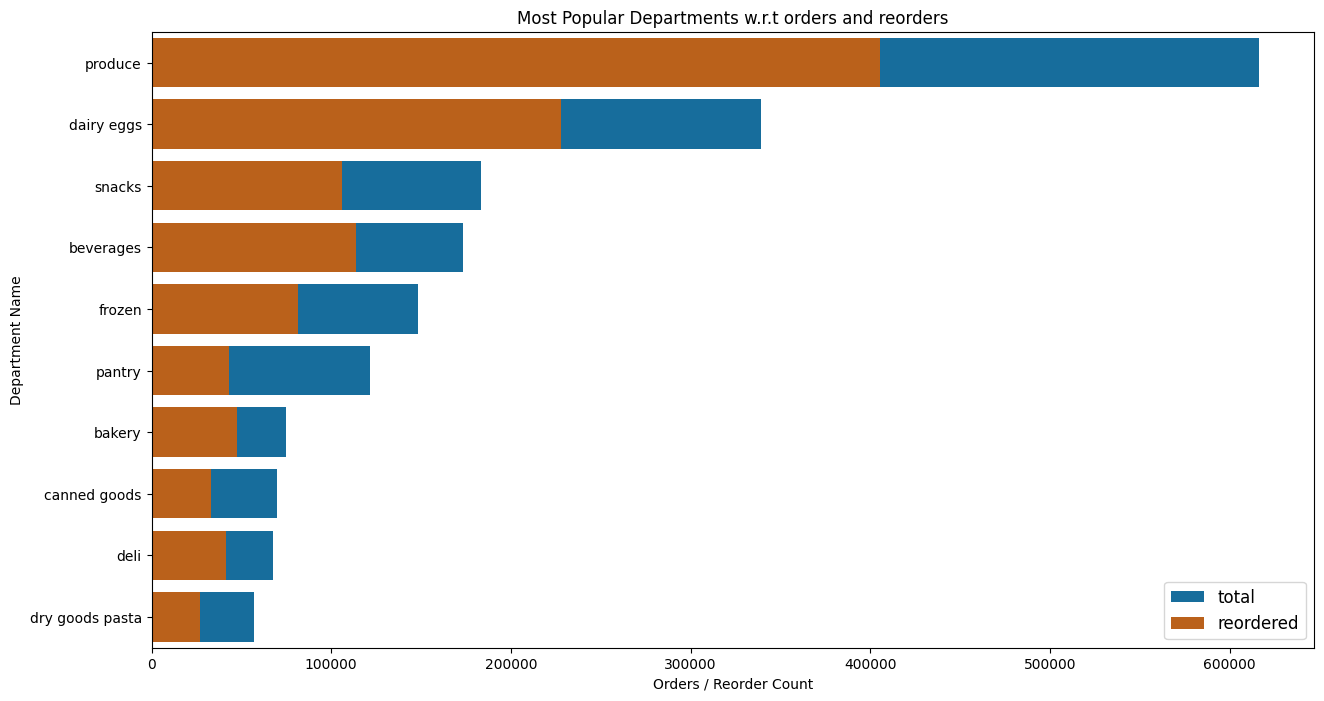

In [47]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y =departmentdf.department[:10], x =departmentdf.total_dept_orders[:10], color=color[0], label = "total")
ax = sns.barplot(y =departmentdf.department[:10], x =departmentdf.total_dept_reorders[:10], color=color[3], label = "reordered")
ax.set_ylabel("Department Name")
ax.set_xlabel("Orders / Reorder Count")
ax.set_title("Most Popular Departments w.r.t orders and reorders")
ax.legend(loc = 4, prop={'size': 12})

### Group products_orders_df by aisle

In [51]:
aisles_count = alldf['aisle'].nunique()
print(f'Number of aisles = {aisles_count}')

Number of aisles = 134


In [61]:
aisledf = alldf.groupby("aisle").agg(
    total_aisle_orders=('add_to_cart_order','count'),
    total_aisle_reorders=('reordered','sum')
)
aisledf = aisledf.sort_values('total_aisle_orders', ascending=False).reset_index()
aisledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   aisle                 134 non-null    object
 1   total_aisle_orders    134 non-null    int64 
 2   total_aisle_reorders  134 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [62]:
aisledf.head()

,aisle,total_aisle_orders,total_aisle_reorders
0,fresh fruits,231632,168381
1,fresh vegetables,224489,135225
2,packaged vegetables fruits,116742,75644
3,yogurt,88509,60446
4,packaged cheese,63122,37339


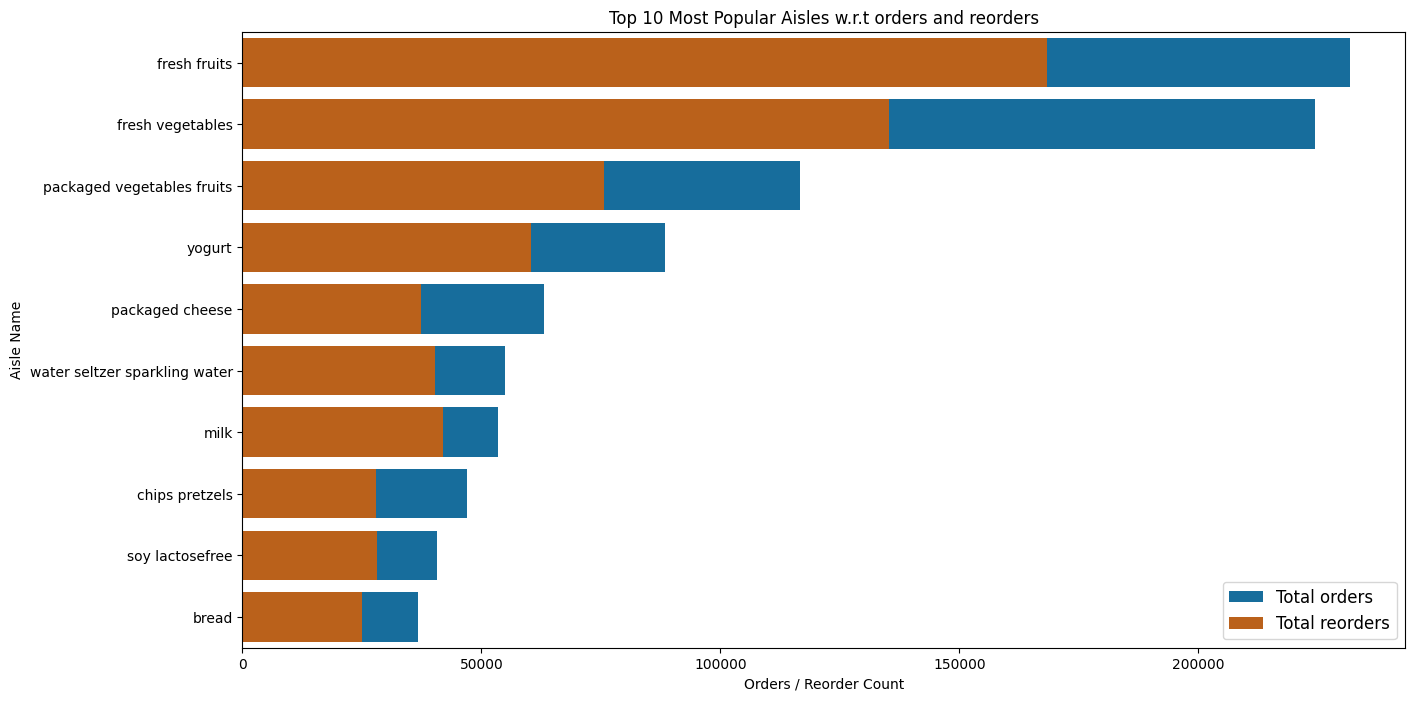

In [64]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y =aisledf.aisle[:10], x =aisledf.total_aisle_orders[:10], color=color[0], label = "Total orders")
ax = sns.barplot(y =aisledf.aisle[:10], x =aisledf.total_aisle_reorders[:10], color=color[3], label = "Total reorders")
ax.set_ylabel("Aisle Name")
ax.set_xlabel("Orders / Reorder Count")
ax.set_title("Top 10 Most Popular Aisles w.r.t orders and reorders")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

### Group products_orders_df by product

In [68]:
product_count = alldf['product_name'].nunique()
print(f'Number of products = {product_count}')

Number of products = 41703


In [70]:
productsdf = alldf.groupby('product_name').agg(
    total_product_orders=('add_to_cart_order','count'),
    total_product_reorders=('reordered','sum')
)
productsdf = productsdf.sort_values('total_product_orders', ascending=False).reset_index()
productsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41703 entries, 0 to 41702
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   product_name            41703 non-null  object
 1   total_product_orders    41703 non-null  int64 
 2   total_product_reorders  41703 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 977.5+ KB


In [71]:
productsdf.head()

,product_name,total_product_orders,total_product_reorders
0,Banana,29586,25485
1,Bag of Organic Bananas,24048,20350
2,Organic Strawberries,16761,13109
3,Organic Baby Spinach,15295,12213
4,Organic Hass Avocado,12346,9971


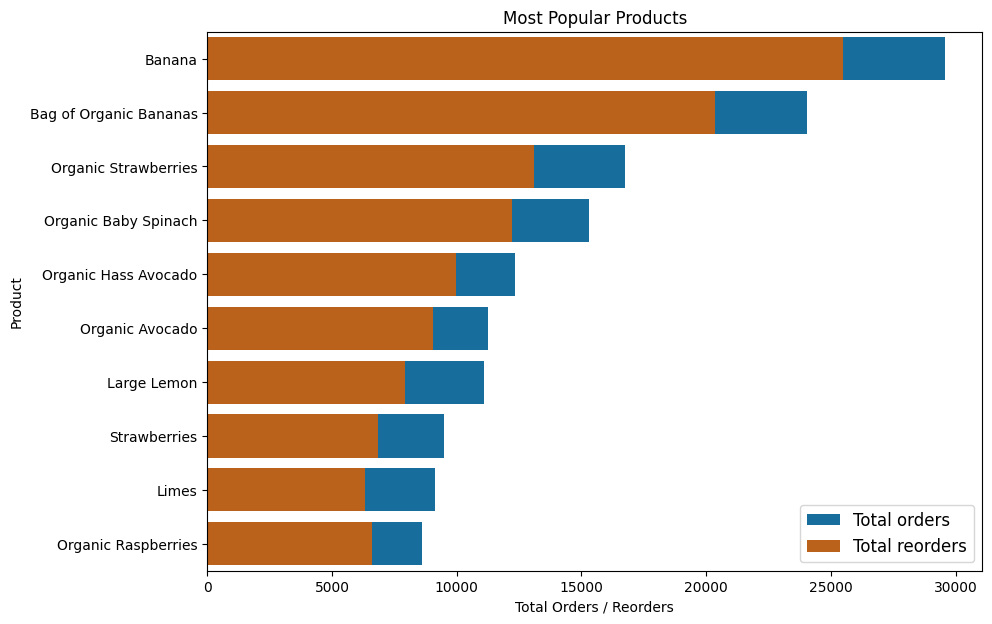

In [72]:
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = productsdf.product_name[0:10], x = productsdf.total_product_orders[0:10], color=color[0], label = "Total orders")
ax = sns.barplot(y = productsdf.product_name[0:10], x = productsdf.total_product_reorders[0:10], color=color[3], label = "Total reorders")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders / Reorders")
ax.set_title("Top 10 Most Popular Products")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [89]:
productsdf['reorder_ratio'] = productsdf.total_product_reorders/productsdf.total_product_orders
productsdf = productsdf.sort_values('reorder_ratio', ascending=False).reset_index(drop=True)
productsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41703 entries, 0 to 41702
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_name            41703 non-null  object 
 1   total_product_orders    41703 non-null  int64  
 2   total_product_reorders  41703 non-null  int64  
 3   reorder_ratio           41703 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ MB


In [90]:
productsdf.head(10)

,product_name,total_product_orders,total_product_reorders,reorder_ratio
0,Original Italian Pesto,1,1,1.0
1,B12 1000mcg Liquid Sublingual Drops Raspberry ...,1,1,1.0
2,"Authentic Deep Dish, Spinach & Garlic Pizza",1,1,1.0
3,Authentic Danish Style Blue Cheese,1,1,1.0
4,Cereals Super Cranberry Cherry & Almond Muesli...,6,6,1.0
5,Mung Bean Pasta,1,1,1.0
6,Millet Rice Bread,2,2,1.0
7,Family Marinara Premium Organic Pasta Sauce,3,3,1.0
8,"Oikos Yogurt Drink, Strawberry",1,1,1.0
9,Nesquik Chocolate Low Fat Milk,2,2,1.0


### Group products_orders_df by product_name for finding unique users

In [73]:
user_count = alldf['user_id'].nunique()
print(f'Number of users = {user_count}')

Number of users = 41234


In [92]:
product_unique_users = alldf.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users = product_unique_users.sort_values('total_users', ascending = False).reset_index(drop=True)
product_unique_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41703 entries, 0 to 41702
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  41703 non-null  object
 1   total_users   41703 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 651.7+ KB


Unique users per product

In [93]:
product_unique_users.head(10)

,product_name,total_users
0,Banana,7271
1,Bag of Organic Bananas,5911
2,Organic Strawberries,4447
3,Organic Baby Spinach,4035
4,Organic Hass Avocado,3184
5,Large Lemon,2969
6,Organic Avocado,2836
7,Strawberries,2573
8,Limes,2513
9,Organic Raspberries,2259


In [94]:
product_unique_users = pd.merge(product_unique_users, productsdf, on='product_name', how='left')
product_unique_users = product_unique_users.sort_values("reorder_ratio", ascending=False).reset_index(drop=True)
product_unique_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41703 entries, 0 to 41702
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_name            41703 non-null  object 
 1   total_users             41703 non-null  int64  
 2   total_product_orders    41703 non-null  int64  
 3   total_product_reorders  41703 non-null  int64  
 4   reorder_ratio           41703 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.6+ MB


Reorder ratio per product

In [95]:
product_unique_users.head(10)

,product_name,total_users,total_product_orders,total_product_reorders,reorder_ratio
0,Chocolate Shell Topping,1,1,1,1.0
1,Yorkshire Gold Tea Bags,2,3,3,1.0
2,Mango Passionfruit Caffeine Free Herbal Tea Bags,0,1,1,1.0
3,PeroxiCare Healthy Gums Baking Soda & Peroxide...,0,1,1,1.0
4,Organic Raspberry Ice Cream,2,4,4,1.0
5,Magnesium Plus B6,0,1,1,1.0
6,Magnesium Citrate Cherry,0,2,2,1.0
7,Madagascar Vanilla Bean Pudding,0,1,1,1.0
8,"Couscous, Israeli, Traditional",2,2,2,1.0
9,Persian Rose Votive Candle,0,1,1,1.0


In [98]:
# sort w.r.t total_product_orders
product_unique_users.sort_values('total_product_orders', ascending=False).head(10)

,product_name,total_users,total_product_orders,total_product_reorders,reorder_ratio
3465,Banana,7271,29586,25485,0.861387
3575,Bag of Organic Bananas,5911,24048,20350,0.846224
4366,Organic Strawberries,4447,16761,13109,0.782113
4247,Organic Baby Spinach,4035,15295,12213,0.798496
3900,Organic Hass Avocado,3184,12346,9971,0.807630
3911,Organic Avocado,2836,11252,9054,0.804657
6002,Large Lemon,2969,11076,7929,0.715872
5953,Strawberries,2573,9507,6839,0.719365
6740,Limes,2513,9135,6341,0.694143
4568,Organic Raspberries,2259,8620,6622,0.768213


### Group products_orders_df by add_to_cart_order

In [104]:
addtocart_count = alldf['add_to_cart_order'].nunique()
print(f'Numbe of unique add to cart order = {addtocart_count}')

Numbe of unique add to cart order = 127


In [106]:
addtocartdf = alldf.groupby('add_to_cart_order')['reordered'].mean().reset_index()
addtocartdf.head(10)

,add_to_cart_order,reordered
0,1,0.698860
1,2,0.687981
2,3,0.664023
3,4,0.643749
4,5,0.619645
5,6,0.603226
6,7,0.588378
7,8,0.575948
8,9,0.563393
9,10,0.556306


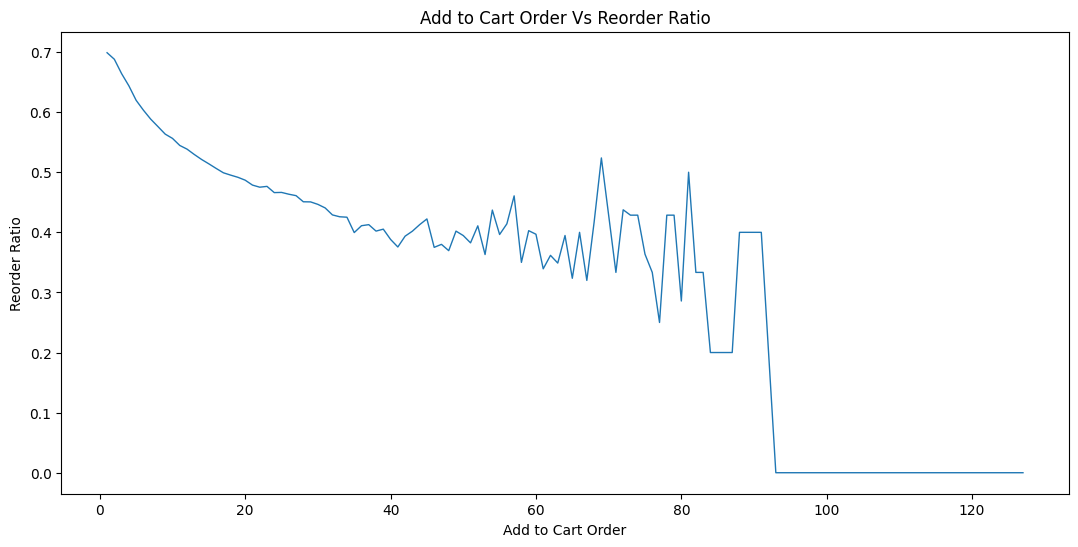

In [110]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.lineplot(x=addtocartdf.add_to_cart_order, y=addtocartdf.reordered, lw = 1)
ax.set_xlabel("Add to Cart Order")
ax.set_ylabel("Reorder Ratio")
ax.set_title("Add to Cart Order Vs Reorder Ratio")
plt.show()

In [109]:
addtocartdf.sort_values('reordered', ascending=False).head(10)

,add_to_cart_order,reordered
0,1,0.698860
1,2,0.687981
2,3,0.664023
3,4,0.643749
4,5,0.619645
5,6,0.603226
6,7,0.588378
7,8,0.575948
8,9,0.563393
9,10,0.556306


### Group products_orders_df by day

In [116]:
daydf = alldf.groupby(['order_dow', 'product_name']).size().reset_index(name='count')
daydf = daydf.sort_values(['order_dow', 'count'], ascending=[True, False])
daydf = daydf.groupby('order_dow').head(5).reset_index(drop=True)

In [117]:
daydf.head()

,order_dow,product_name,count
0,0.0,Banana,2096
1,0.0,Bag of Organic Bananas,1544
2,0.0,Organic Strawberries,1172
3,0.0,Organic Baby Spinach,1161
4,0.0,Large Lemon,843


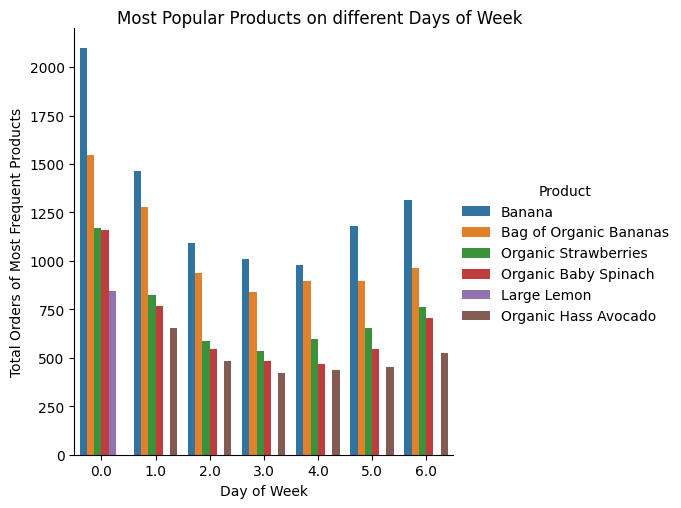

In [119]:
ax = sns.catplot(x="order_dow", y="count", hue="product_name", data=daydf, kind="bar", legend=False)
ax.add_legend(title="Product")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on different Days of Week", va="baseline", ha="center")

### Organic products

In [122]:
product_unique_users['Organic'] = product_unique_users.product_name.str.contains("Organic")
product_unique_users = product_unique_users.sort_values('Organic', ascending=False).reset_index(drop=True)
product_unique_users.head(10)

,product_name,total_users,total_product_orders,total_product_reorders,reorder_ratio,Organic
0,Organic Apples Pommes,30,96,40,0.416667,True
1,Organic Gracious Granola,17,60,47,0.783333,True
2,Organic Champagne Vinegar,2,6,0,0.000000,True
3,Organic Peruvian Crunch Bar,2,4,1,0.250000,True
4,Organic Lightly Sweetened Iced Green Tea with ...,4,23,18,0.782609,True
5,Organic Yerba Mate Unsweetened Hibiscus Lime,5,23,18,0.782609,True
6,Organic Italian Peeled Tomatoes,3,6,2,0.333333,True
7,Organic Bunny Fruit Snacks Strawberry Fruit Sn...,2,6,0,0.000000,True
8,Organic Cold Brew Coffee,12,46,36,0.782609,True
9,Organic Lowfat Yogurt Banana Vanilla,68,235,184,0.782979,True


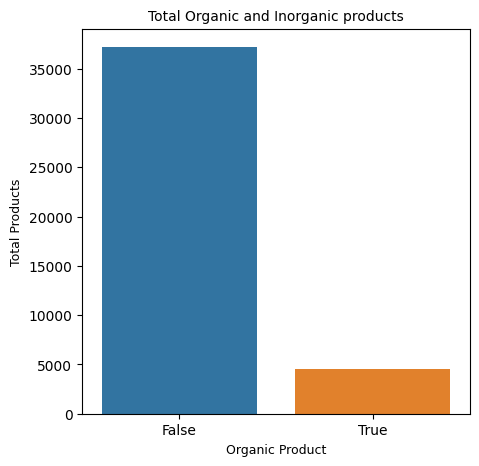

In [123]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic').size().index, y = product_unique_users.groupby('Organic').size().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Total Products", size = 9)
ax.set_title("Total Organic and Inorganic products", size = 10)
plt.show()

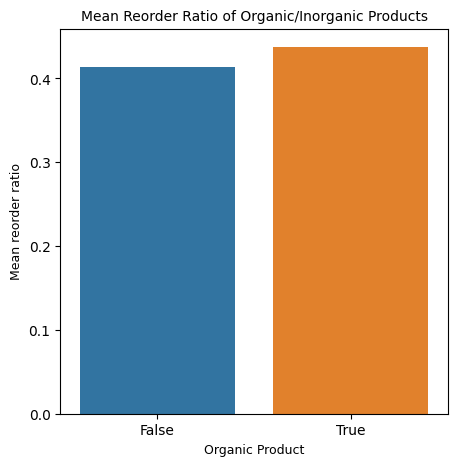

In [124]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic')['reorder_ratio'].mean().index, y = product_unique_users.groupby('Organic')['reorder_ratio'].mean().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Mean reorder ratio", size = 9)
ax.set_title("Mean Reorder Ratio of Organic/Inorganic Products", size = 10)
plt.show()

## Market Basket Analysis

In [10]:
orders2 = orders_df.copy()
priors2 = orderprior_df.copy()
train2 = ordertrain_df.copy()
products2 = prod_df.copy()
aisles2 = aisle_df.copy()
departments2 = dept_df.copy()

In [11]:
alldf2 = pd.concat([priors2, train2])
alldf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097150 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 80.0 MB


In [13]:
alldf2 = reduce_memory(alldf2)
alldf2.info()

Memory usage of properties dataframe is : 79  MB

___MEMORY USAGE AFTER COMPLETION___
Memory usage is:  37.99996376037598  MB
Memory reduction = 48%
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097150 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int32
 1   product_id         int32
 2   add_to_cart_order  int16
 3   reordered          int8 
dtypes: int16(1), int32(2), int8(1)
memory usage: 38.0 MB


In [14]:
alldf2.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


Sorting dataframe w.r.t frequency of product orders

In [15]:
product_frequency = alldf2.groupby('product_id').count().reset_index().rename(columns = {'order_id':'order_frequency'})
product_frequency = product_frequency.sort_values('order_frequency', ascending=False).reset_index(drop = True)
product_frequency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41703 entries, 0 to 41702
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   product_id         41703 non-null  int64
 1   order_frequency    41703 non-null  int64
 2   add_to_cart_order  41703 non-null  int64
 3   reordered          41703 non-null  int64
dtypes: int64(4)
memory usage: 1.3 MB


In [16]:
product_frequency.head()

,product_id,order_frequency,add_to_cart_order,reordered
0,24852,29586,29586,29586
1,13176,24048,24048,24048
2,21137,16761,16761,16761
3,21903,15295,15295,15295
4,47209,12346,12346,12346


In [17]:
product_frequency =product_frequency.sort_values('order_frequency', ascending=False)[0:100].reset_index(drop = True)
product_frequency = pd.merge(product_frequency, products2, on = 'product_id', how = 'left')
product_frequency.head(10)

,product_id,order_frequency,add_to_cart_order,reordered,Unnamed: 0,product_name,aisle_id,department_id
0,24852,29586,29586,29586,24851,Banana,24,4
1,13176,24048,24048,24048,13175,Bag of Organic Bananas,24,4
2,21137,16761,16761,16761,21136,Organic Strawberries,24,4
3,21903,15295,15295,15295,21902,Organic Baby Spinach,123,4
4,47209,12346,12346,12346,47208,Organic Hass Avocado,24,4
5,47766,11252,11252,11252,47765,Organic Avocado,24,4
6,47626,11076,11076,11076,47625,Large Lemon,24,4
7,16797,9507,9507,9507,16796,Strawberries,24,4
8,26209,9135,9135,9135,26208,Limes,24,4
9,27966,8620,8620,8620,27965,Organic Raspberries,123,4


In [18]:
product_frequency = product_frequency.drop(['Unnamed: 0'], axis=1)
product_frequency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_id         100 non-null    int64 
 1   order_frequency    100 non-null    int64 
 2   add_to_cart_order  100 non-null    int64 
 3   reordered          100 non-null    int64 
 4   product_name       100 non-null    object
 5   aisle_id           100 non-null    int64 
 6   department_id      100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 6.2+ KB


Number of unique orders

In [20]:
frequent_prod_ids = list(product_frequency.product_id)
alldf2 = alldf2[alldf2.product_id.isin(frequent_prod_ids)]
alldf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478994 entries, 1 to 1048571
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   order_id           478994 non-null  int32
 1   product_id         478994 non-null  int32
 2   add_to_cart_order  478994 non-null  int16
 3   reordered          478994 non-null  int8 
dtypes: int16(1), int32(2), int8(1)
memory usage: 8.7 MB


In [23]:
print(f'Number of unique orders for top 100 most frequent products = {alldf2.order_id.nunique()}')

Number of unique orders for top 100 most frequent products = 147218


In [24]:
alldf3 = pd.merge(alldf2, products2, on = 'product_id', how='left')
alldf3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478994 entries, 0 to 478993
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   order_id           478994 non-null  int32 
 1   product_id         478994 non-null  int32 
 2   add_to_cart_order  478994 non-null  int16 
 3   reordered          478994 non-null  int8  
 4   Unnamed: 0         478994 non-null  int64 
 5   product_name       478994 non-null  object
 6   aisle_id           478994 non-null  int64 
 7   department_id      478994 non-null  int64 
dtypes: int16(1), int32(2), int64(3), int8(1), object(1)
memory usage: 23.3+ MB


In [25]:
alldf3 = alldf3.drop(['Unnamed: 0'], axis=1)
alldf3.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,28985,2,1,Michigan Organic Kale,83,4
1,2,17794,6,1,Carrots,83,4
2,3,24838,2,1,Unsweetened Almondmilk,91,16
3,3,21903,4,1,Organic Baby Spinach,123,4
4,3,46667,6,1,Organic Ginger Root,83,4


In [26]:
alldf3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478994 entries, 0 to 478993
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   order_id           478994 non-null  int32 
 1   product_id         478994 non-null  int32 
 2   add_to_cart_order  478994 non-null  int16 
 3   reordered          478994 non-null  int8  
 4   product_name       478994 non-null  object
 5   aisle_id           478994 non-null  int64 
 6   department_id      478994 non-null  int64 
dtypes: int16(1), int32(2), int64(2), int8(1), object(1)
memory usage: 19.6+ MB


In [27]:
alldf3 = reduce_memory(alldf3)
alldf3.info()

Memory usage of properties dataframe is : 19  MB

___MEMORY USAGE AFTER COMPLETION___
Memory usage is:  12.790519714355469  MB
Memory reduction = 67%
<class 'pandas.core.frame.DataFrame'>
Int64Index: 478994 entries, 0 to 478993
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   order_id           478994 non-null  int32 
 1   product_id         478994 non-null  int32 
 2   add_to_cart_order  478994 non-null  int8  
 3   reordered          478994 non-null  int8  
 4   product_name       478994 non-null  object
 5   aisle_id           478994 non-null  int8  
 6   department_id      478994 non-null  int8  
dtypes: int32(2), int8(4), object(1)
memory usage: 12.8+ MB


In [28]:
basket = alldf3.groupby(['order_id', 'product_name'])['reordered'].count().unstack().reset_index().fillna(0).set_index('order_id')
basket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147218 entries, 1 to 2593147
Data columns (total 100 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   100% Raw Coconut Water                          147218 non-null  float64
 1   100% Whole Wheat Bread                          147218 non-null  float64
 2   2% Reduced Fat Milk                             147218 non-null  float64
 3   Apple Honeycrisp Organic                        147218 non-null  float64
 4   Asparagus                                       147218 non-null  float64
 5   Bag of Organic Bananas                          147218 non-null  float64
 6   Banana                                          147218 non-null  float64
 7   Blueberries                                     147218 non-null  float64
 8   Boneless Skinless Chicken Breasts               147218 non-null  float64
 9   Broccoli Crown          

In [29]:
basket.head()

product_name,100% Raw Coconut Water,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Blueberries,Boneless Skinless Chicken Breasts,Broccoli Crown,Bunched Cilantro,Carrots,"Clementines, Bag",Cucumber Kirby,Extra Virgin Olive Oil,Feta Cheese Crumbles,Fresh Cauliflower,Garlic,Granny Smith Apples,Grape White/Green Seedless,Grated Parmesan,Green Bell Pepper,Half & Half,Hass Avocados,Honeycrisp Apple,Jalapeno Peppers,Large Alfresco Eggs,Large Lemon,Lime Sparkling Water,Limes,Michigan Organic Kale,Orange Bell Pepper,Organic Avocado,Organic Baby Arugula,Organic Baby Carrots,Organic Baby Spinach,Organic Banana,Organic Black Beans,Organic Blackberries,Organic Blueberries,Organic Broccoli,Organic Broccoli Florets,Organic Carrot Bunch,Organic Cilantro,Organic Cucumber,Organic D'Anjou Pears,Organic Fuji Apple,Organic Gala Apples,Organic Garlic,Organic Garnet Sweet Potato (Yam),Organic Ginger Root,Organic Grade A Free Range Large Brown Eggs,Organic Granny Smith Apple,Organic Grape Tomatoes,Organic Half & Half,Organic Hass Avocado,Organic Italian Parsley Bunch,Organic Kiwi,Organic Lacinato (Dinosaur) Kale,Organic Large Extra Fancy Fuji Apple,Organic Lemon,Organic Navel Orange,Organic Peeled Whole Baby Carrots,Organic Raspberries,Organic Red Bell Pepper,Organic Red Onion,Organic Reduced Fat 2% Milk,Organic Reduced Fat Milk,Organic Romaine Lettuce,Organic Small Bunch Celery,Organic Spring Mix,Organic Strawberries,Organic Tomato Cluster,Organic Unsweetened Almond Milk,Organic Whole Milk,Organic Whole String Cheese,Organic Yellow Onion,Organic Zucchini,Original Hummus,Pure Irish Butter,Raspberries,Red Onion,Red Peppers,Red Vine Tomato,Roma Tomato,Seedless Red Grapes,Shredded Parmesan,Small Hass Avocado,Soda,Sparkling Lemon Water,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Whole Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [31]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1 
    
basket = basket.applymap(encode_units)
basket.head()

product_name,100% Raw Coconut Water,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Blueberries,Boneless Skinless Chicken Breasts,Broccoli Crown,Bunched Cilantro,Carrots,"Clementines, Bag",Cucumber Kirby,Extra Virgin Olive Oil,Feta Cheese Crumbles,Fresh Cauliflower,Garlic,Granny Smith Apples,Grape White/Green Seedless,Grated Parmesan,Green Bell Pepper,Half & Half,Hass Avocados,Honeycrisp Apple,Jalapeno Peppers,Large Alfresco Eggs,Large Lemon,Lime Sparkling Water,Limes,Michigan Organic Kale,Orange Bell Pepper,Organic Avocado,Organic Baby Arugula,Organic Baby Carrots,Organic Baby Spinach,Organic Banana,Organic Black Beans,Organic Blackberries,Organic Blueberries,Organic Broccoli,Organic Broccoli Florets,Organic Carrot Bunch,Organic Cilantro,Organic Cucumber,Organic D'Anjou Pears,Organic Fuji Apple,Organic Gala Apples,Organic Garlic,Organic Garnet Sweet Potato (Yam),Organic Ginger Root,Organic Grade A Free Range Large Brown Eggs,Organic Granny Smith Apple,Organic Grape Tomatoes,Organic Half & Half,Organic Hass Avocado,Organic Italian Parsley Bunch,Organic Kiwi,Organic Lacinato (Dinosaur) Kale,Organic Large Extra Fancy Fuji Apple,Organic Lemon,Organic Navel Orange,Organic Peeled Whole Baby Carrots,Organic Raspberries,Organic Red Bell Pepper,Organic Red Onion,Organic Reduced Fat 2% Milk,Organic Reduced Fat Milk,Organic Romaine Lettuce,Organic Small Bunch Celery,Organic Spring Mix,Organic Strawberries,Organic Tomato Cluster,Organic Unsweetened Almond Milk,Organic Whole Milk,Organic Whole String Cheese,Organic Yellow Onion,Organic Zucchini,Original Hummus,Pure Irish Butter,Raspberries,Red Onion,Red Peppers,Red Vine Tomato,Roma Tomato,Seedless Red Grapes,Shredded Parmesan,Small Hass Avocado,Soda,Sparkling Lemon Water,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Whole Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147218 entries, 1 to 2593147
Data columns (total 100 columns):
 #   Column                                          Non-Null Count   Dtype
---  ------                                          --------------   -----
 0   100% Raw Coconut Water                          147218 non-null  int64
 1   100% Whole Wheat Bread                          147218 non-null  int64
 2   2% Reduced Fat Milk                             147218 non-null  int64
 3   Apple Honeycrisp Organic                        147218 non-null  int64
 4   Asparagus                                       147218 non-null  int64
 5   Bag of Organic Bananas                          147218 non-null  int64
 6   Banana                                          147218 non-null  int64
 7   Blueberries                                     147218 non-null  int64
 8   Boneless Skinless Chicken Breasts               147218 non-null  int64
 9   Broccoli Crown                                

In [33]:
basket = reduce_memory(basket)
basket.info()

Memory usage of properties dataframe is : 113  MB

___MEMORY USAGE AFTER COMPLETION___
Memory usage is:  15.162986755371094  MB
Memory reduction = 13%
<class 'pandas.core.frame.DataFrame'>
Int64Index: 147218 entries, 1 to 2593147
Data columns (total 100 columns):
 #   Column                                          Non-Null Count   Dtype
---  ------                                          --------------   -----
 0   100% Raw Coconut Water                          147218 non-null  int8 
 1   100% Whole Wheat Bread                          147218 non-null  int8 
 2   2% Reduced Fat Milk                             147218 non-null  int8 
 3   Apple Honeycrisp Organic                        147218 non-null  int8 
 4   Asparagus                                       147218 non-null  int8 
 5   Bag of Organic Bananas                          147218 non-null  int8 
 6   Banana                                          147218 non-null  int8 
 7   Blueberries                                    

Creating frequent sets and rules

In [34]:
frequent_items = apriori(basket.astype('bool') ,min_support=0.01, use_colnames=True, low_memory=True)
frequent_items.head()

,support,itemsets
0,0.015025,(100% Raw Coconut Water)
1,0.025004,(100% Whole Wheat Bread)
2,0.016119,(2% Reduced Fat Milk)
3,0.030302,(Apple Honeycrisp Organic)
4,0.034316,(Asparagus)


In [35]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47,(Limes),(Large Lemon),0.062051,0.075235,0.014346,0.231199,3.073005,0.009678,1.202866
46,(Large Lemon),(Limes),0.075235,0.062051,0.014346,0.190683,3.073005,0.009678,1.158939
69,(Organic Raspberries),(Organic Strawberries),0.058553,0.113852,0.015664,0.267517,2.349703,0.008998,1.209788
68,(Organic Strawberries),(Organic Raspberries),0.113852,0.058553,0.015664,0.137581,2.349703,0.008998,1.091636
65,(Organic Hass Avocado),(Organic Raspberries),0.083862,0.058553,0.010827,0.129111,2.205036,0.005917,1.081018
64,(Organic Raspberries),(Organic Hass Avocado),0.058553,0.083862,0.010827,0.184919,2.205036,0.005917,1.123984
53,(Limes),(Organic Avocado),0.062051,0.076431,0.010277,0.165627,2.167013,0.005535,1.106902
52,(Organic Avocado),(Limes),0.076431,0.062051,0.010277,0.134465,2.167013,0.005535,1.083664
49,(Large Lemon),(Organic Avocado),0.075235,0.076431,0.012390,0.164680,2.154632,0.006639,1.105648
48,(Organic Avocado),(Large Lemon),0.076431,0.075235,0.012390,0.162105,2.154632,0.006639,1.103675


In [38]:
rules = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False]).reset_index(drop=True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Limes),(Large Lemon),0.062051,0.075235,0.014346,0.231199,3.073005,0.009678,1.202866
1,(Large Lemon),(Limes),0.075235,0.062051,0.014346,0.190683,3.073005,0.009678,1.158939
2,(Organic Raspberries),(Organic Strawberries),0.058553,0.113852,0.015664,0.267517,2.349703,0.008998,1.209788
3,(Organic Strawberries),(Organic Raspberries),0.113852,0.058553,0.015664,0.137581,2.349703,0.008998,1.091636
4,(Organic Raspberries),(Organic Hass Avocado),0.058553,0.083862,0.010827,0.184919,2.205036,0.005917,1.123984
5,(Organic Hass Avocado),(Organic Raspberries),0.083862,0.058553,0.010827,0.129111,2.205036,0.005917,1.081018
6,(Limes),(Organic Avocado),0.062051,0.076431,0.010277,0.165627,2.167013,0.005535,1.106902
7,(Organic Avocado),(Limes),0.076431,0.062051,0.010277,0.134465,2.167013,0.005535,1.083664
8,(Large Lemon),(Organic Avocado),0.075235,0.076431,0.012390,0.164680,2.154632,0.006639,1.105648
9,(Organic Avocado),(Large Lemon),0.076431,0.075235,0.012390,0.162105,2.154632,0.006639,1.103675


# Customer Segmentation

In [20]:
orders3 = orders_df.copy()
priors3 = orderprior_df.copy()
train3 = ordertrain_df.copy()
products3 = prod_df.copy()
aisles3 = aisle_df.copy()
departments3 = dept_df.copy()

In [21]:
alldf4 = pd.merge(priors3, products3, on='product_id', how='left')
alldf4 = pd.merge(alldf4, aisles3, on ='aisle_id', how='left')
alldf4 = pd.merge(alldf4, departments3, on ='department_id', how='left')
alldf4 = pd.merge(alldf4, orders3, on='order_id', how='left')
alldf4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.9+ GB


In [22]:
cs_df = alldf4.copy()

In [23]:
cs_df = reduce_memory(cs_df)

Memory usage of properties dataframe is : 3959  MB

___MEMORY USAGE AFTER COMPLETION___
Memory usage is:  1948.7121648788452  MB
Memory reduction = 49%


In [24]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   product_id              int32  
 2   add_to_cart_order       int16  
 3   reordered               int8   
 4   product_name            object 
 5   aisle_id                int16  
 6   department_id           int8   
 7   aisle                   object 
 8   department              object 
 9   user_id                 int32  
 10  eval_set                object 
 11  order_number            int8   
 12  order_dow               int8   
 13  order_hour_of_day       int8   
 14  days_since_prior_order  float16
dtypes: float16(1), int16(2), int32(3), int8(5), object(4)
memory usage: 1.9+ GB


In [25]:
print(f'Number of unique user ids = {cs_df.user_id.nunique()}')

Number of unique user ids = 206209


In [26]:
cross_df = pd.crosstab(cs_df.user_id, cs_df.aisle)
cross_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk dried fruits vegetables,bulk grains rice dried goods,buns rolls,butter,candy chocolate,canned fruit applesauce,canned jarred vegetables,canned meals beans,canned meat seafood,cat food care,cereal,chips pretzels,cleaning products,cocoa drink mixes,coffee,cold flu allergy,condiments,cookies cakes,crackers,cream,deodorants,diapers wipes,digestion,dish detergents,dog food care,doughs gelatins bake mixes,dry pasta,eggs,energy granola bars,energy sports drinks,eye ear care,facial care,feminine care,first aid,food storage,fresh dips tapenades,fresh fruits,fresh herbs,fresh pasta,fresh vegetables,frozen appetizers sides,frozen breads doughs,frozen breakfast,frozen dessert,frozen juice,frozen meals,frozen meat seafood,frozen pizza,frozen produce,frozen vegan vegetarian,fruit vegetable snacks,grains rice dried goods,granola,hair care,honeys syrups nectars,hot cereal pancake mixes,hot dogs bacon sausage,ice cream ice,ice cream toppings,indian foods,instant foods,juice nectars,kitchen supplies,kosher foods,latino foods,laundry,lunch meat,marinades meat preparation,meat counter,milk,mint gum,missing,more household,muscles joints pain relief,nuts seeds dried fruit,oils vinegars,oral hygiene,other,other creams cheeses,packaged cheese,packaged meat,packaged poultry,packaged produce,packaged seafood,packaged vegetables fruits,paper goods,pasta sauce,pickled goods olives,plates bowls cups flatware,popcorn jerky,poultry counter,prepared meals,prepared soups salads,preserved dips spreads,protein meal replacements,red wines,refrigerated,refrigerated pudding desserts,salad dressing toppings,seafood counter,shave needs,skin care,soap,soft drinks,soup broth bouillon,soy lactosefree,specialty cheeses,specialty wines champagnes,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,8,0,0,0,0,0,2,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,1,0,0,12,0,0,0,0,5,0,11,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,9,33,0,0,0,0,1,0,0,0,12,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,10,0,0,0,0,0,0,0,3,0,1,0,0,5,0,1,0,0,3,0,0,1,0,10,0,0,1,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,5,0,0,0,0,14,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [27]:
df = cross_df.div(cross_df.sum(axis=1), axis=0)
df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk dried fruits vegetables,bulk grains rice dried goods,buns rolls,butter,candy chocolate,canned fruit applesauce,canned jarred vegetables,canned meals beans,canned meat seafood,cat food care,cereal,chips pretzels,cleaning products,cocoa drink mixes,coffee,cold flu allergy,condiments,cookies cakes,crackers,cream,deodorants,diapers wipes,digestion,dish detergents,dog food care,doughs gelatins bake mixes,dry pasta,eggs,energy granola bars,energy sports drinks,eye ear care,facial care,feminine care,first aid,food storage,fresh dips tapenades,fresh fruits,fresh herbs,fresh pasta,fresh vegetables,frozen appetizers sides,frozen breads doughs,frozen breakfast,frozen dessert,frozen juice,frozen meals,frozen meat seafood,frozen pizza,frozen produce,frozen vegan vegetarian,fruit vegetable snacks,grains rice dried goods,granola,hair care,honeys syrups nectars,hot cereal pancake mixes,hot dogs bacon sausage,ice cream ice,ice cream toppings,indian foods,instant foods,juice nectars,kitchen supplies,kosher foods,latino foods,laundry,lunch meat,marinades meat preparation,meat counter,milk,mint gum,missing,more household,muscles joints pain relief,nuts seeds dried fruit,oils vinegars,oral hygiene,other,other creams cheeses,packaged cheese,packaged meat,packaged poultry,packaged produce,packaged seafood,packaged vegetables fruits,paper goods,pasta sauce,pickled goods olives,plates bowls cups flatware,popcorn jerky,poultry counter,prepared meals,prepared soups salads,preserved dips spreads,protein meal replacements,red wines,refrigerated,refrigerated pudding desserts,salad dressing toppings,seafood counter,shave needs,skin care,soap,soft drinks,soup broth bouillon,soy lactosefree,specialty cheeses,specialty wines champagnes,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.016949,0.0,0.000000,0.0,0.000000,0.0,0.050847,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.033898,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.084746,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.152542,0.000000,0.000000,0.0,0.000000,0.135593,0.0,0.000000,0.0,0.0,0.000000,0.033898,0.0,0.000000,0.000000,0.203390,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.220339,0.000000,0.033898,0.0,0.000000,0.0,0.0,0.016949,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.016949
2,0.0,0.015385,0.0,0.0,0.0,0.0,0.010256,0.0,0.0,0.0,0.0,0.005128,0.005128,0.010256,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.005128,0.0,0.000000,0.061538,0.0,0.0,0.0,0.0,0.025641,0.0,0.056410,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.030769,0.0,0.0,0.0,0.0,0.0,0.0,0.046154,0.169231,0.000000,0.000000,0.000000,0.0,0.005128,0.000000,0.0,0.0,0.061538,0.0,0.0,0.0,0.020513,0.0,0.0,0.005128,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005128,0.0,0.0,0.0,0.0,0.051282,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.015385,0.000000,0.005128,0.0,0.000000,0.025641,0.0,0.005128,0.0,0.0,0.015385,0.000000,0.0,0.005128,0.000000,0.051282,0.0,0.000000,0.005128,0.0,0.0,0.000000,0.025641,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.005128,0.0,0.000000,0.0,0.0,0.015385,0.005128,0.005128,0.000000,0.0,0.0,0.0,0.010256,0.0,0.215385
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.

In [28]:
df.shape

(206209, 134)

In [29]:
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.113443,0.039084,-0.042863,0.018865,-0.088340,-0.104555,-0.116439,0.083703,-0.063333,-0.025748
1,-0.036988,0.108884,-0.066406,-0.123271,0.098848,-0.033946,-0.054734,-0.053410,-0.020323,-0.008141
2,0.064282,0.103962,0.000710,-0.012221,-0.046985,0.112254,-0.029797,0.007808,0.012122,0.001903
3,-0.093210,0.054093,0.001867,-0.003974,-0.071355,-0.019278,-0.025123,-0.038229,0.006814,-0.000681
4,0.094629,-0.037051,-0.024952,-0.021575,0.055369,0.107650,-0.008029,0.103930,0.051607,-0.025766


In [30]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca)
    Sum_of_squared_distances.append(km.inertia_)

c:\Users\harsh\Desktop\portfolio\envs\leadschool1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\harsh\Desktop\portfolio\envs\leadschool1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\harsh\Desktop\portfolio\envs\leadschool1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\harsh\Desktop\portfolio\envs\leadschool1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

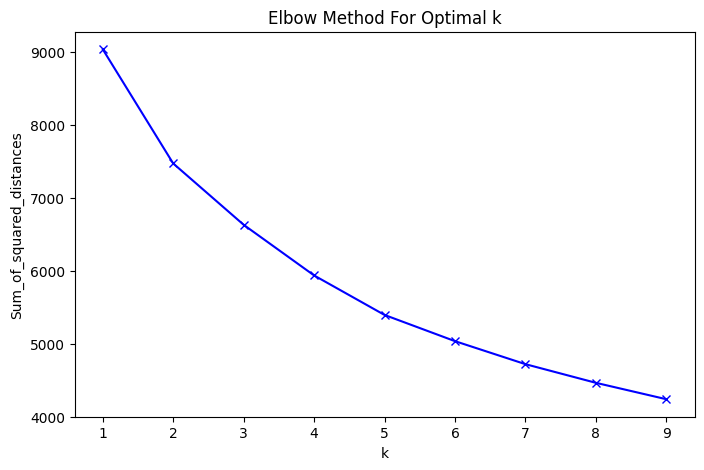

In [31]:
plt.subplots(figsize = (8, 5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [32]:
clusterer = KMeans(n_clusters=5,random_state=42).fit(df_pca)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(df_pca)
print(centers)

c:\Users\harsh\Desktop\portfolio\envs\leadschool1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-1.98274645e-01  1.61778114e-02  3.17235431e-01 -3.14082925e-02
   1.87339120e-02  6.18706110e-04  4.05939788e-03  1.08860125e-02
   1.14122552e-03 -3.86421731e-03]
 [ 6.76120162e-02  1.05930479e-01 -1.11835805e-03 -3.09454342e-02
  -1.07477233e-02  7.18204291e-03 -5.27655499e-04  4.50847287e-03
  -7.04880279e-04 -1.61367275e-04]
 [-7.38969394e-02 -1.05681775e-02 -2.70079584e-02 -7.00755255e-03
  -6.75384348e-03  1.54766684e-03  5.04031770e-04 -2.53132922e-03
  -3.18900010e-04 -4.07732034e-04]
 [ 1.05528778e-01 -7.30636691e-02  1.72474938e-02  3.66955215e-03
   1.76771821e-03 -4.42465892e-03 -9.44651172e-04  1.29884363e-03
  -1.77915986e-04  7.73517023e-04]
 [-6.14576087e-03  1.30681529e-01  4.86043141e-03  2.30150208e-01
   1.10160889e-01 -2.27770809e-02  9.38631989e-05 -6.40235432e-03
   7.80210667e-03  3.05031149e-03]]


In [33]:
temp_df = df_pca.iloc[:, 0:2]
temp_df.columns = ["pc1", "pc2"]
temp_df['cluster'] = c_preds
temp_df.head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_21712\1558269435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['cluster'] = c_preds


,pc1,pc2,cluster
0,-0.113443,0.039084,2
1,-0.036988,0.108884,1
2,0.064282,0.103962,1
3,-0.093210,0.054093,2
4,0.094629,-0.037051,3


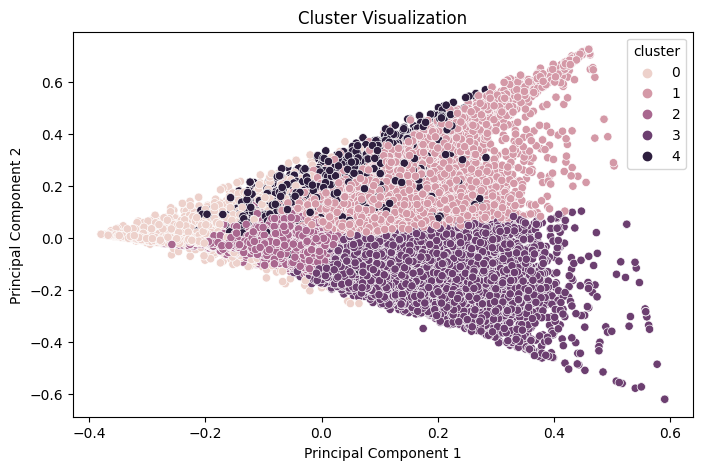

In [34]:
fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.scatterplot(data = temp_df, x = "pc1", y = "pc2", hue = "cluster")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("Cluster Visualization")
plt.show();

In [35]:
cross_df['cluster'] = c_preds

cluster1 = cross_df[cross_df.cluster == 0]
cluster2 = cross_df[cross_df.cluster == 1]
cluster3 = cross_df[cross_df.cluster == 2]
cluster4 = cross_df[cross_df.cluster == 3]
cluster5 = cross_df[cross_df.cluster == 4]

In [67]:
len(cross_df.cluster)

206209

In [36]:
cluster1.shape

(5414, 135)

In [46]:
cluster1.shape[0]

5414

In [37]:
cluster1.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
water seltzer sparkling water    20.950683
fresh fruits                      3.336535
soft drinks                       2.800702
yogurt                            2.254895
energy granola bars               1.557074
chips pretzels                    1.346694
milk                              1.327484
tea                               1.327115
packaged vegetables fruits        1.251201
soy lactosefree                   1.082564
dtype: float64

In [54]:
cluster1_index_list = cluster1.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10].index.tolist()

In [38]:
cluster2.shape

(37858, 135)

In [39]:
cluster2.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh fruits                     35.760236
fresh vegetables                 15.030377
packaged vegetables fruits       12.097205
yogurt                            9.879444
milk                              5.956310
packaged cheese                   5.112235
soy lactosefree                   3.776903
water seltzer sparkling water     3.614031
bread                             3.196022
chips pretzels                    3.130118
dtype: float64

In [53]:
cluster2_index_list = cluster2.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10].index.tolist()

In [40]:
cluster3.shape

(99147, 135)

In [41]:
cluster3.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh fruits                     9.776766
fresh vegetables                 7.574934
yogurt                           7.224888
packaged vegetables fruits       6.002582
packaged cheese                  4.931405
chips pretzels                   4.482445
milk                             4.255207
water seltzer sparkling water    4.091319
refrigerated                     3.257275
ice cream ice                    3.098359
dtype: float64

In [57]:
cluster3_index_list = cluster3.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10].index.tolist()

In [42]:
cluster4.shape

(55843, 135)

In [43]:
cluster4.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh vegetables                 37.034740
fresh fruits                     21.749458
packaged vegetables fruits       12.028508
yogurt                            6.161220
packaged cheese                   5.020110
fresh herbs                       4.150511
milk                              4.004226
soy lactosefree                   3.705657
frozen produce                    3.302813
water seltzer sparkling water     3.080350
dtype: float64

In [59]:
cluster4_index_list = cluster4.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10].index.tolist()

In [44]:
cluster5.shape

(7947, 135)

In [45]:
cluster5.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
packaged produce                 18.358374
fresh fruits                     10.874670
packaged vegetables fruits        4.242733
fresh vegetables                  3.108846
water seltzer sparkling water     1.714861
milk                              1.615075
packaged cheese                   1.548761
frozen produce                    1.145086
chips pretzels                    1.139172
nuts seeds dried fruit            1.033220
dtype: float64

In [61]:
cluster5_index_list = cluster5.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10].index.tolist()

Customer Segmentation conclusions

In [63]:
print(f'1. Cluster 1 contains {cluster1.shape[0]} consumers that prefer products such as {cluster1_index_list[0]}, {cluster1_index_list[1]}, {cluster1_index_list[2]}, etc.\n')
print(f'2. Cluster 2 contains {cluster2.shape[0]} consumers that prefer products such as {cluster2_index_list[0]}, {cluster2_index_list[1]}, {cluster2_index_list[2]}, etc.\n')
print(f'3. Cluster 3 contains {cluster3.shape[0]} consumers that prefer products such as {cluster3_index_list[0]}, {cluster3_index_list[1]}, {cluster3_index_list[2]}, etc.\n')
print(f'4. Cluster 4 contains {cluster4.shape[0]} consumers that prefer products such as {cluster4_index_list[0]}, {cluster4_index_list[1]}, {cluster4_index_list[2]}, etc.\n')
print(f'5. Cluster 5 contains {cluster5.shape[0]} consumers that prefer products such as {cluster5_index_list[0]}, {cluster5_index_list[1]}, {cluster5_index_list[2]}, etc.\n')

1. Cluster 1 contains 5414 consumers that prefer products such as water seltzer sparkling water, fresh fruits, soft drinks, etc.

2. Cluster 2 contains 37858 consumers that prefer products such as fresh fruits, fresh vegetables, packaged vegetables fruits, etc.

3. Cluster 3 contains 99147 consumers that prefer products such as fresh fruits, fresh vegetables, yogurt, etc.

4. Cluster 4 contains 55843 consumers that prefer products such as fresh vegetables, fresh fruits, packaged vegetables fruits, etc.

5. Cluster 5 contains 7947 consumers that prefer products such as packaged produce, fresh fruits, packaged vegetables fruits, etc.



# Predictive model

## Data preparation for learning

### Feature Engineering

In [96]:
orders4 = orders_df.copy()
priors4 = orderprior_df.copy()
train4 = ordertrain_df.copy()
products4 = prod_df.copy()
aisles4 = aisle_df.copy()
departments4 = dept_df.copy()

In [97]:
order4 = reduce_memory(orders4)
orders4.info()

Memory usage of properties dataframe is : 182  MB

___MEMORY USAGE AFTER COMPLETION___
Memory usage is:  68.5147008895874  MB
Memory reduction = 37%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   eval_set                object 
 3   order_number            int8   
 4   order_dow               int8   
 5   order_hour_of_day       int8   
 6   days_since_prior_order  float16
dtypes: float16(1), int32(2), int8(3), object(1)
memory usage: 68.5+ MB


In [98]:
priors4 = reduce_memory(priors4)
priors4.info()

Memory usage of properties dataframe is : 989  MB

___MEMORY USAGE AFTER COMPLETION___
Memory usage is:  340.2514524459839  MB
Memory reduction = 34%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int32
 1   product_id         int32
 2   add_to_cart_order  int16
 3   reordered          int8 
dtypes: int16(1), int32(2), int8(1)
memory usage: 340.3 MB


In [99]:
train4 = reduce_memory(train4)
train4.info()

Memory usage of properties dataframe is : 42  MB

___MEMORY USAGE AFTER COMPLETION___
Memory usage is:  13.204858779907227  MB
Memory reduction = 31%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int32
 1   product_id         1384617 non-null  int32
 2   add_to_cart_order  1384617 non-null  int8 
 3   reordered          1384617 non-null  int8 
dtypes: int32(2), int8(2)
memory usage: 13.2 MB


In [100]:
products4 = reduce_memory(products4)
products4.info()

Memory usage of properties dataframe is : 1  MB

___MEMORY USAGE AFTER COMPLETION___
Memory usage is:  0.7109146118164062  MB
Memory reduction = 71%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int32 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int16 
 3   department_id  49688 non-null  int8  
dtypes: int16(1), int32(1), int8(1), object(1)
memory usage: 728.0+ KB


In [101]:
aisles4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [102]:
departments4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [103]:
featuresdf = pd.merge(priors4, orders4, on='order_id', how='left')
featuresdf = pd.merge(featuresdf, products4, on='product_id', how='left')
featuresdf.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13


In [104]:
featuresdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   product_id              int32  
 2   add_to_cart_order       int16  
 3   reordered               int8   
 4   user_id                 int32  
 5   eval_set                object 
 6   order_number            int8   
 7   order_dow               int8   
 8   order_hour_of_day       int8   
 9   days_since_prior_order  float16
 10  product_name            object 
 11  aisle_id                int16  
 12  department_id           int8   
dtypes: float16(1), int16(2), int32(3), int8(5), object(2)
memory usage: 1.4+ GB


Counting number of times a product was purchased by a user

In [105]:
featuresdf['count_purchased_user'] = featuresdf.groupby(['user_id', 'product_id']).cumcount() + 1

In [106]:
featuresdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   product_id              int32  
 2   add_to_cart_order       int16  
 3   reordered               int8   
 4   user_id                 int32  
 5   eval_set                object 
 6   order_number            int8   
 7   order_dow               int8   
 8   order_hour_of_day       int8   
 9   days_since_prior_order  float16
 10  product_name            object 
 11  aisle_id                int16  
 12  department_id           int8   
 13  count_purchased_user    int64  
dtypes: float16(1), int16(2), int32(3), int64(1), int8(5), object(2)
memory usage: 1.7+ GB


In [116]:
featuresdf1 = featuresdf.groupby('product_id').agg(
    mean_add_to_cart_order=('add_to_cart_order','mean'),
    total_orders=('reordered','count'),
    total_reorders=('reordered','sum'),
    reorder_percentage=('reordered','mean'),
    order_first_time_total_count=('count_purchased_user',lambda x: sum(x==1)),
    order_second_time_total_count=('count_purchased_user',lambda x: sum(x==2)),
    is_organic=('product_name',lambda x: 1 if 'Organic' in x else 0),
    unique_users=('user_id',lambda x: x.nunique()),
)
featuresdf1.reset_index(drop=True)
featuresdf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49677 entries, 1 to 49688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mean_add_to_cart_order         49677 non-null  float64
 1   total_orders                   49677 non-null  int64  
 2   total_reorders                 49677 non-null  int64  
 3   reorder_percentage             49677 non-null  float64
 4   order_first_time_total_count   49677 non-null  int64  
 5   order_second_time_total_count  49677 non-null  int64  
 6   is_organic                     49677 non-null  int64  
 7   unique_users                   49677 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 3.4 MB


In [117]:
featuresdf1.head()

,mean_add_to_cart_order,total_orders,total_reorders,reorder_percentage,order_first_time_total_count,order_second_time_total_count,is_organic,unique_users
product_id,,,,,,,,
1,5.801836,1852,1136,0.613391,716,276,0,716
2,9.888889,90,12,0.133333,78,8,0,78
3,6.415162,277,203,0.732852,74,36,0,74
4,9.507599,329,147,0.446809,182,64,0,182
5,6.466667,15,9,0.600000,6,4,0,6


In [118]:
featuresdf1['second_time_percent'] = featuresdf1.order_second_time_total_count/featuresdf1.order_first_time_total_count

In [119]:
# aisle features
featuresdf2 = featuresdf.groupby('aisle_id').agg(
    aisle_mean_add_to_cart_order=('add_to_cart_order','mean'),
    aisle_std_add_to_cart_order=('add_to_cart_order','std'),
    aisle_total_orders=('reordered','count'),
    aisle_total_reorders=('reordered','sum'),
    aisle_reorder_percentage=('reordered','mean'),
    aisle_unique_users=('user_id',lambda x: x.nunique())
)
featuresdf2.reset_index(inplace = True)
featuresdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   aisle_id                      134 non-null    int64  
 1   aisle_mean_add_to_cart_order  134 non-null    float64
 2   aisle_std_add_to_cart_order   134 non-null    float64
 3   aisle_total_orders            134 non-null    int64  
 4   aisle_total_reorders          134 non-null    int64  
 5   aisle_reorder_percentage      134 non-null    float64
 6   aisle_unique_users            134 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 7.5 KB


In [120]:
featuresdf2.head()

,aisle_id,aisle_mean_add_to_cart_order,aisle_std_add_to_cart_order,aisle_total_orders,aisle_total_reorders,aisle_reorder_percentage,aisle_unique_users
0,1,8.167640,7.104166,71928,42912,0.596597,20711
1,2,9.275497,7.473802,82491,40365,0.489326,31222
2,3,9.571935,7.899672,456386,272922,0.598007,63592
3,4,10.161450,7.745705,200687,98243,0.489533,53892
4,5,10.297600,8.187047,62510,17542,0.280627,32312


In [121]:
# department features
featuresdf3 = featuresdf.groupby('department_id').agg(
    department_mean_add_to_cart_order=('add_to_cart_order','mean'),
    department_std_add_to_cart_order=('add_to_cart_order','std'),
    department_total_orders=('reordered','count'),
    department_total_reorders=('reordered','sum'),
    department_reorder_percentage=('reordered','mean'),
    department_unique_users=('user_id',lambda x: x.nunique())
)
featuresdf3.reset_index(inplace = True)
featuresdf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   department_id                      21 non-null     int64  
 1   department_mean_add_to_cart_order  21 non-null     float64
 2   department_std_add_to_cart_order   21 non-null     float64
 3   department_total_orders            21 non-null     int64  
 4   department_total_reorders          21 non-null     int64  
 5   department_reorder_percentage      21 non-null     float64
 6   department_unique_users            21 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 1.3 KB


In [123]:
featuresdf4 = pd.merge(featuresdf1, products4, on = 'product_id', how = 'left')
featuresdf4 = pd.merge(featuresdf4, featuresdf2, on = 'aisle_id', how = 'left')
featuresdf4 = pd.merge(featuresdf4, aisles4, on = 'aisle_id', how = 'left')
featuresdf4 = pd.merge(featuresdf4, featuresdf3, on = 'department_id', how = 'left')
featuresdf4 = pd.merge(featuresdf4, departments4, on = 'department_id', how = 'left')
featuresdf4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49677 entries, 0 to 49676
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   product_id                         49677 non-null  int64  
 1   mean_add_to_cart_order             49677 non-null  float64
 2   total_orders                       49677 non-null  int64  
 3   total_reorders                     49677 non-null  int64  
 4   reorder_percentage                 49677 non-null  float64
 5   order_first_time_total_count       49677 non-null  int64  
 6   order_second_time_total_count      49677 non-null  int64  
 7   is_organic                         49677 non-null  int64  
 8   unique_users                       49677 non-null  int64  
 9   second_time_percent                49677 non-null  float64
 10  product_name                       49677 non-null  object 
 11  aisle_id                           49677 non-null  int

In [124]:
featuresdf4 = featuresdf4.drop(['product_name', 'aisle_id', 'department_id'], axis=1)
featuresdf4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49677 entries, 0 to 49676
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   product_id                         49677 non-null  int64  
 1   mean_add_to_cart_order             49677 non-null  float64
 2   total_orders                       49677 non-null  int64  
 3   total_reorders                     49677 non-null  int64  
 4   reorder_percentage                 49677 non-null  float64
 5   order_first_time_total_count       49677 non-null  int64  
 6   order_second_time_total_count      49677 non-null  int64  
 7   is_organic                         49677 non-null  int64  
 8   unique_users                       49677 non-null  int64  
 9   second_time_percent                49677 non-null  float64
 10  aisle_mean_add_to_cart_order       49677 non-null  float64
 11  aisle_std_add_to_cart_order        49677 non-null  flo

In [125]:
featuresdf4.head()

,product_id,mean_add_to_cart_order,total_orders,total_reorders,reorder_percentage,order_first_time_total_count,order_second_time_total_count,is_organic,unique_users,second_time_percent,aisle_mean_add_to_cart_order,aisle_std_add_to_cart_order,aisle_total_orders,aisle_total_reorders,aisle_reorder_percentage,aisle_unique_users,aisle,department_mean_add_to_cart_order,department_std_add_to_cart_order,department_total_orders,department_total_reorders,department_reorder_percentage,department_unique_users,department
0,1,5.801836,1852,1136,0.613391,716,276,0,716,0.385475,9.253092,7.845107,234065,128431,0.548698,54202,cookies cakes,9.187743,7.692492,2887550,1657973,0.574180,174219,snacks
1,2,9.888889,90,12,0.133333,78,8,0,78,0.102564,9.996181,7.994790,212092,32321,0.152391,76402,spices seasonings,9.593425,7.875241,1875577,650301,0.346721,172755,pantry
2,3,6.415162,277,203,0.732852,74,36,0,74,0.486486,8.519846,7.818249,249341,131556,0.527615,53197,tea,6.976699,6.711172,2690129,1757892,0.653460,172795,beverages
3,4,9.507599,329,147,0.446809,182,64,0,182,0.351648,9.207741,7.435740,390299,217262,0.556655,58749,frozen meals,8.996414,7.393502,2236432,1211890,0.541885,163233,frozen
4,5,6.466667,15,9,0.600000,6,4,0,6,0.666667,10.297600,8.187047,62510,17542,0.280627,32312,marinades meat preparation,9.593425,7.875241,1875577,650301,0.346721,172755,pantry


In [126]:
encoder= ce.BinaryEncoder(cols=['aisle', 'department'],return_df=True)

In [127]:
featuresdf4 = encoder.fit_transform(featuresdf4)
featuresdf4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49677 entries, 0 to 49676
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   product_id                         49677 non-null  int64  
 1   mean_add_to_cart_order             49677 non-null  float64
 2   total_orders                       49677 non-null  int64  
 3   total_reorders                     49677 non-null  int64  
 4   reorder_percentage                 49677 non-null  float64
 5   order_first_time_total_count       49677 non-null  int64  
 6   order_second_time_total_count      49677 non-null  int64  
 7   is_organic                         49677 non-null  int64  
 8   unique_users                       49677 non-null  int64  
 9   second_time_percent                49677 non-null  float64
 10  aisle_mean_add_to_cart_order       49677 non-null  float64
 11  aisle_std_add_to_cart_order        49677 non-null  flo

In [128]:
featuresdf4.head()

,product_id,mean_add_to_cart_order,total_orders,total_reorders,reorder_percentage,order_first_time_total_count,order_second_time_total_count,is_organic,unique_users,second_time_percent,aisle_mean_add_to_cart_order,aisle_std_add_to_cart_order,aisle_total_orders,aisle_total_reorders,aisle_reorder_percentage,aisle_unique_users,aisle_0,aisle_1,aisle_2,aisle_3,aisle_4,aisle_5,aisle_6,aisle_7,department_mean_add_to_cart_order,department_std_add_to_cart_order,department_total_orders,department_total_reorders,department_reorder_percentage,department_unique_users,department_0,department_1,department_2,department_3,department_4
0,1,5.801836,1852,1136,0.613391,716,276,0,716,0.385475,9.253092,7.845107,234065,128431,0.548698,54202,0,0,0,0,0,0,0,1,9.187743,7.692492,2887550,1657973,0.574180,174219,0,0,0,0,1
1,2,9.888889,90,12,0.133333,78,8,0,78,0.102564,9.996181,7.994790,212092,32321,0.152391,76402,0,0,0,0,0,0,1,0,9.593425,7.875241,1875577,650301,0.346721,172755,0,0,0,1,0
2,3,6.415162,277,203,0.732852,74,36,0,74,0.486486,8.519846,7.818249,249341,131556,0.527615,53197,0,0,0,0,0,0,1,1,6.976699,6.711172,2690129,1757892,0.653460,172795,0,0,0,1,1
3,4,9.507599,329,147,0.446809,182,64,0,182,0.351648,9.207741,7.435740,390299,217262,0.556655,58749,0,0,0,0,0,1,0,0,8.996414,7.393502,2236432,1211890,0.541885,163233,0,0,1,0,0
4,5,6.466667,15,9,0.600000,6,4,0,6,0.666667,10.297600,8.187047,62510,17542,0.280627,32312,0,0,0,0,0,1,0,1,9.593425,7.875241,1875577,650301,0.346721,172755,0,0,0,1,0


In [130]:
display_null(featuresdf,'feaaturesdf')

Dataframe name = feaaturesdf


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,count_purchased_user
column dtype,int32,int32,int16,int8,int32,object,int8,int8,int8,float16,object,int16,int8,int64
count null values,0,0,0,0,0,0,0,0,0,2078068,0,0,0,0
% null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.40697,0.0,0.0,0.0,0.0


In [131]:
featuresdf.days_since_prior_order =featuresdf.days_since_prior_order.fillna(0)

In [132]:
display_null(featuresdf, '')

Dataframe name = 


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,count_purchased_user
column dtype,int32,int32,int16,int8,int32,object,int8,int8,int8,float16,object,int16,int8,int64
count null values,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
# user features
featuresdf5 = featuresdf.groupby('user_id').agg(
    order_day_avg=('order_dow','mean'),
    order_day_std=('order_dow','std'),
    order_hour_avg=('order_hour_of_day','mean'),
    order_hour_std=('order_hour_of_day','std'),
    day_since_prior_avg=('days_since_prior_order','mean'),
    day_since_prior_std=('days_since_prior_order','std'),
    total_orders_by_user=('order_number',lambda x: x.nunique()),
    total_products_by_user=('product_id','count'),
    total_unique_product_by_user=('product_id',lambda x: x.nunique()),
    total_reorders_by_user=('reordered','sum'),
    reorder_propotion_by_user=('reordered','mean')
)
featuresdf5.reset_index(inplace = True)
featuresdf5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   user_id                       206209 non-null  int64  
 1   order_day_avg                 206209 non-null  float64
 2   order_day_std                 206209 non-null  float64
 3   order_hour_avg                206209 non-null  float64
 4   order_hour_std                206209 non-null  float64
 5   day_since_prior_avg           206209 non-null  float32
 6   day_since_prior_std           206209 non-null  float64
 7   total_orders_by_user          206209 non-null  int64  
 8   total_products_by_user        206209 non-null  int64  
 9   total_unique_product_by_user  206209 non-null  int64  
 10  total_reorders_by_user        206209 non-null  int64  
 11  reorder_propotion_by_user     206209 non-null  float64
dtypes: float32(1), float64(6), int64(5)
memory u

In [134]:
featuresdf5.head()

,user_id,order_day_avg,order_day_std,order_hour_avg,order_hour_std,day_since_prior_avg,day_since_prior_std,total_orders_by_user,total_products_by_user,total_unique_product_by_user,total_reorders_by_user,reorder_propotion_by_user
0,1,2.644068,1.256194,10.542373,3.500355,18.542374,10.559065,10,59,18,41,0.694915
1,2,2.005128,0.971222,10.441026,1.649854,14.902564,9.671712,14,195,102,93,0.476923
2,3,1.011364,1.245630,16.352273,1.454599,10.181818,5.867396,12,88,33,55,0.625000
3,4,4.722222,0.826442,13.111111,1.745208,11.944445,9.973330,5,18,17,1,0.055556
4,5,1.621622,1.276961,15.729730,2.588958,10.189189,7.600577,4,37,23,14,0.378378


In [135]:
featuresdf6 = featuresdf.groupby(['user_id', 'order_number']).agg(
    average_order_size=('reordered','count'),
    reorder_in_order=('reordered','mean')    
)
featuresdf6.reset_index(inplace = True)
featuresdf6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214874 entries, 0 to 3214873
Data columns (total 4 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             int64  
 1   order_number        int64  
 2   average_order_size  int64  
 3   reorder_in_order    float64
dtypes: float64(1), int64(3)
memory usage: 98.1 MB


In [136]:
featuresdf6.head()

,user_id,order_number,average_order_size,reorder_in_order
0,1,1,5,0.000
1,1,2,6,0.500
2,1,3,5,0.600
3,1,4,5,1.000
4,1,5,8,0.625


In [137]:
featuresdf7 = featuresdf6.groupby('user_id').agg({'average_order_size' : 'mean', 
                                   'reorder_in_order':'mean'})
featuresdf7 = featuresdf7.reset_index()
featuresdf7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             206209 non-null  int64  
 1   average_order_size  206209 non-null  float64
 2   reorder_in_order    206209 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 4.7 MB


In [138]:
featuresdf7.head()

,user_id,average_order_size,reorder_in_order
0,1,5.900000,0.705833
1,2,13.928571,0.447961
2,3,7.333333,0.658817
3,4,3.600000,0.028571
4,5,9.250000,0.377778


In [139]:
featuresdf5 = pd.merge(featuresdf5, featuresdf7, on = 'user_id', how = 'left')
featuresdf5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206209 entries, 0 to 206208
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   user_id                       206209 non-null  int64  
 1   order_day_avg                 206209 non-null  float64
 2   order_day_std                 206209 non-null  float64
 3   order_hour_avg                206209 non-null  float64
 4   order_hour_std                206209 non-null  float64
 5   day_since_prior_avg           206209 non-null  float32
 6   day_since_prior_std           206209 non-null  float64
 7   total_orders_by_user          206209 non-null  int64  
 8   total_products_by_user        206209 non-null  int64  
 9   total_unique_product_by_user  206209 non-null  int64  
 10  total_reorders_by_user        206209 non-null  int64  
 11  reorder_propotion_by_user     206209 non-null  float64
 12  average_order_size            206209 non-nul

In [140]:
featuresdf5.head()

,user_id,order_day_avg,order_day_std,order_hour_avg,order_hour_std,day_since_prior_avg,day_since_prior_std,total_orders_by_user,total_products_by_user,total_unique_product_by_user,total_reorders_by_user,reorder_propotion_by_user,average_order_size,reorder_in_order
0,1,2.644068,1.256194,10.542373,3.500355,18.542374,10.559065,10,59,18,41,0.694915,5.900000,0.705833
1,2,2.005128,0.971222,10.441026,1.649854,14.902564,9.671712,14,195,102,93,0.476923,13.928571,0.447961
2,3,1.011364,1.245630,16.352273,1.454599,10.181818,5.867396,12,88,33,55,0.625000,7.333333,0.658817
3,4,4.722222,0.826442,13.111111,1.745208,11.944445,9.973330,5,18,17,1,0.055556,3.600000,0.028571
4,5,1.621622,1.276961,15.729730,2.588958,10.189189,7.600577,4,37,23,14,0.378378,9.250000,0.377778


In [141]:
last3 = featuresdf6.groupby('user_id')['order_number'].nlargest(3).reset_index()
last3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618627 entries, 0 to 618626
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   user_id       618627 non-null  int64
 1   level_1       618627 non-null  int64
 2   order_number  618627 non-null  int64
dtypes: int64(3)
memory usage: 14.2 MB


In [142]:
last3 = pd.merge(featuresdf6, last3, on = ['user_id', 'order_number'], how = 'inner')
last3.head()

,user_id,order_number,average_order_size,reorder_in_order,level_1
0,1,8,6,0.666667,7
1,1,9,6,1.000000,8
2,1,10,9,0.666667,9
3,2,12,19,0.578947,21
4,2,13,9,0.000000,22


In [143]:
last3['rank'] = last3.groupby("user_id")["order_number"].rank("dense", ascending=True)

In [144]:
last_order_feats = last3.pivot_table(index = 'user_id', columns = ['rank'], \
                                                 values=['average_order_size', 'reorder_in_order']).\
                                                reset_index(drop = False)
last_order_feats.columns = ['user_id','orders_3', 'orders_2', 'orders_1', 'reorder_3', 'reorder_2', 'reorder_1']
last_order_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    206209 non-null  int64  
 1   orders_3   206209 non-null  int64  
 2   orders_2   206209 non-null  int64  
 3   orders_1   206209 non-null  int64  
 4   reorder_3  206209 non-null  float64
 5   reorder_2  206209 non-null  float64
 6   reorder_1  206209 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 11.0 MB


In [145]:
featuresdf5 =featuresdf5.merge(last_order_feats, on = 'user_id', how = 'left')
featuresdf5.head()

,user_id,order_day_avg,order_day_std,order_hour_avg,order_hour_std,day_since_prior_avg,day_since_prior_std,total_orders_by_user,total_products_by_user,total_unique_product_by_user,total_reorders_by_user,reorder_propotion_by_user,average_order_size,reorder_in_order,orders_3,orders_2,orders_1,reorder_3,reorder_2,reorder_1
0,1,2.644068,1.256194,10.542373,3.500355,18.542374,10.559065,10,59,18,41,0.694915,5.900000,0.705833,6,6,9,0.666667,1.0,0.666667
1,2,2.005128,0.971222,10.441026,1.649854,14.902564,9.671712,14,195,102,93,0.476923,13.928571,0.447961,19,9,16,0.578947,0.0,0.625000
2,3,1.011364,1.245630,16.352273,1.454599,10.181818,5.867396,12,88,33,55,0.625000,7.333333,0.658817,6,5,6,0.833333,1.0,1.000000
3,4,4.722222,0.826442,13.111111,1.745208,11.944445,9.973330,5,18,17,1,0.055556,3.600000,0.028571,7,2,3,0.142857,0.0,0.000000
4,5,1.621622,1.276961,15.729730,2.588958,10.189189,7.600577,4,37,23,14,0.378378,9.250000,0.377778,9,5,12,0.444444,0.4,0.666667


In [146]:
# user_product_feats
featuresdf8 = featuresdf.groupby(['user_id', 'product_id']).agg(
    total_product_orders_by_user=('reordered','count'),
    total_product_reorders_by_user=('reordered','sum'),
    user_product_reorder_percentager=('reordered','mean'),
    avg_add_to_cart_by_user=('add_to_cart_order','mean'),
    avg_days_since_last_bought=('days_since_prior_order','mean'),
    last_ordered_in=('order_number','max'),
)
featuresdf8.reset_index(inplace = True)
featuresdf8.head()

,user_id,product_id,total_product_orders_by_user,total_product_reorders_by_user,user_product_reorder_percentager,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in
0,1,196,10,9,0.900000,1.400000,17.600000,10
1,1,10258,9,8,0.888889,3.333333,19.555555,10
2,1,10326,1,0,0.000000,5.000000,28.000000,5
3,1,12427,10,9,0.900000,3.300000,17.600000,10
4,1,13032,3,2,0.666667,6.333333,21.666666,10


In [147]:
last3.head()

,user_id,order_number,average_order_size,reorder_in_order,level_1,rank
0,1,8,6,0.666667,7,1.0
1,1,9,6,1.000000,8,2.0
2,1,10,9,0.666667,9,3.0
3,2,12,19,0.578947,21,1.0
4,2,13,9,0.000000,22,2.0


In [148]:
last_orders = pd.merge(featuresdf, last3, on = ['user_id', 'order_number'], how = 'inner')
last_orders.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,count_purchased_user,average_order_size,reorder_in_order,level_1,rank
0,7,34050,1,0,142903,prior,11,2,14,30.0,Orange Juice,31,7,1,2,0.000000,2231251,2.0
1,7,46802,2,0,142903,prior,11,2,14,30.0,Pineapple Chunks,116,1,1,2,0.000000,2231251,2.0
2,14,20392,1,1,18194,prior,49,3,15,3.0,Hair Bender Whole Bean Coffee,26,7,1,11,0.818182,282882,1.0
3,14,27845,2,1,18194,prior,49,3,15,3.0,Organic Whole Milk,84,16,1,11,0.818182,282882,1.0
4,14,162,3,1,18194,prior,49,3,15,3.0,Organic Mini Homestyle Waffles,52,1,1,11,0.818182,282882,1.0


In [149]:
last_orders['rank'] = last_orders.groupby(['user_id', 'product_id'])['order_number'].rank("dense", ascending=True)

In [150]:
product_purchase_history = last_orders.pivot_table(index = ['user_id', 'product_id'],\
                                                   columns='rank', values = 'reordered').reset_index()
product_purchase_history.columns = ['user_id', 'product_id', 'is_reorder_3', 'is_reorder_2', 'is_reorder_1']
product_purchase_history.fillna(0, inplace = True)
product_purchase_history.head()

,user_id,product_id,is_reorder_3,is_reorder_2,is_reorder_1
0,1,196,1.0,1.0,1.0
1,1,10258,1.0,1.0,1.0
2,1,12427,1.0,1.0,1.0
3,1,13032,1.0,0.0,0.0
4,1,25133,1.0,1.0,1.0


In [152]:
featuresdf8 = pd.merge(featuresdf8, product_purchase_history, on=['user_id', 'product_id'], how = 'left')
featuresdf8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13307953 entries, 0 to 13307952
Data columns (total 11 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   user_id                           int64  
 1   product_id                        int64  
 2   total_product_orders_by_user      int64  
 3   total_product_reorders_by_user    int8   
 4   user_product_reorder_percentager  float64
 5   avg_add_to_cart_by_user           float64
 6   avg_days_since_last_bought        float32
 7   last_ordered_in                   int8   
 8   is_reorder_3                      float64
 9   is_reorder_2                      float64
 10  is_reorder_1                      float64
dtypes: float32(1), float64(5), int64(3), int8(2)
memory usage: 989.9 MB


In [153]:
display_null(featuresdf8, '')

Dataframe name = 


,user_id,product_id,total_product_orders_by_user,total_product_reorders_by_user,user_product_reorder_percentager,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in,is_reorder_3,is_reorder_2,is_reorder_1
column dtype,int64,int64,int64,int8,float64,float64,float32,int8,float64,float64,float64
count null values,0,0,0,0,0,0,0,0,8382738,8382738,8382738
% null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.990439,62.990439,62.990439


In [154]:
featuresdf8.fillna(0, inplace = True)

In [155]:
display_null(featuresdf8, '')

Dataframe name = 


,user_id,product_id,total_product_orders_by_user,total_product_reorders_by_user,user_product_reorder_percentager,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in,is_reorder_3,is_reorder_2,is_reorder_1
column dtype,int64,int64,int64,int8,float64,float64,float32,int8,float64,float64,float64
count null values,0,0,0,0,0,0,0,0,0,0,0
% null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### creating dataset

In [156]:
featuresdf1copy = featuresdf1.copy()
featuresdf5copy = featuresdf5.copy()
featuresdf8copy = featuresdf8.copy()

Merging train orders with orders

In [157]:
train5 = ordertrain_df.copy()

In [158]:
train5 = reduce_memory(train5)
train5.info()

Memory usage of properties dataframe is : 42  MB

___MEMORY USAGE AFTER COMPLETION___
Memory usage is:  13.204858779907227  MB
Memory reduction = 31%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int32
 1   product_id         1384617 non-null  int32
 2   add_to_cart_order  1384617 non-null  int8 
 3   reordered          1384617 non-null  int8 
dtypes: int32(2), int8(2)
memory usage: 13.2 MB


In [159]:
orders5 = orders_df.copy()
orders5 = reduce_memory(orders5)

Memory usage of properties dataframe is : 182  MB

___MEMORY USAGE AFTER COMPLETION___
Memory usage is:  68.5147008895874  MB
Memory reduction = 37%


In [166]:
trainorders = pd.merge(orders5, train5, on = 'order_id', how = 'inner')
trainorders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1


In [167]:
trainorders.drop(['eval_set', 'add_to_cart_order', 'order_id'], axis=1, inplace = True)
trainorders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   user_id                 1384617 non-null  int32  
 1   order_number            1384617 non-null  int8   
 2   order_dow               1384617 non-null  int8   
 3   order_hour_of_day       1384617 non-null  int8   
 4   days_since_prior_order  1384617 non-null  float16
 5   product_id              1384617 non-null  int32  
 6   reordered               1384617 non-null  int8   
dtypes: float16(1), int32(2), int8(4)
memory usage: 29.1 MB


In [168]:
print(f'Number of unique user ids in train data = {trainorders.user_id.nunique()}')

Number of unique user ids in train data = 131209


In [172]:
userstrain = trainorders.user_id.unique()

In [173]:
featuresdf8copy.shape

(13307953, 11)

In [174]:
featuresdf8copy = featuresdf8copy[featuresdf8copy.user_id.isin(userstrain)]
featuresdf8copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474661 entries, 0 to 13307952
Data columns (total 11 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   user_id                           int64  
 1   product_id                        int64  
 2   total_product_orders_by_user      int64  
 3   total_product_reorders_by_user    int8   
 4   user_product_reorder_percentager  float64
 5   avg_add_to_cart_by_user           float64
 6   avg_days_since_last_bought        float32
 7   last_ordered_in                   int8   
 8   is_reorder_3                      float64
 9   is_reorder_2                      float64
 10  is_reorder_1                      float64
dtypes: float32(1), float64(5), int64(3), int8(2)
memory usage: 630.4 MB


In [175]:
prep1 = pd.merge(featuresdf8copy, trainorders, on = ['user_id', 'product_id'], how = 'outer')
prep1.head()

,user_id,product_id,total_product_orders_by_user,total_product_reorders_by_user,user_product_reorder_percentager,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in,is_reorder_3,is_reorder_2,is_reorder_1,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered
0,1,196,10.0,9.0,0.900000,1.400000,17.600000,10.0,1.0,1.0,1.0,11.0,4.0,8.0,14.0,1.0
1,1,10258,9.0,8.0,0.888889,3.333333,19.555555,10.0,1.0,1.0,1.0,11.0,4.0,8.0,14.0,1.0
2,1,10326,1.0,0.0,0.000000,5.000000,28.000000,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1,12427,10.0,9.0,0.900000,3.300000,17.600000,10.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,1,13032,3.0,2.0,0.666667,6.333333,21.666666,10.0,1.0,0.0,0.0,11.0,4.0,8.0,14.0,1.0


for order_number, order_dow, order_hour_of_day, days_since_prior_order, impute null values with mean values grouped by users as these products will also be potential candidate for order.

In [176]:
prep1.order_number.fillna(prep1.groupby('user_id')['order_number'].transform('mean'), inplace = True)

prep1.order_dow.fillna(prep1.groupby('user_id')['order_dow'].transform('mean'), inplace = True)

prep1.order_hour_of_day.fillna(prep1.groupby('user_id')['order_hour_of_day'].transform('mean'), inplace = True)

prep1.days_since_prior_order.fillna(prep1.groupby('user_id')['days_since_prior_order'].\
                                                             transform('mean'), inplace = True)

In [177]:
prep1.reordered.value_counts()

1.0    828824
0.0    555793
Name: reordered, dtype: int64

In [178]:
prep1.reordered.isnull().sum()

7645837

In [179]:
prep2 = prep1[prep1.reordered != 0]
prep2.shape

(8474661, 16)

In [180]:
prep2.reordered.fillna(0, inplace=True)
display_null(prep2, '')

C:\Users\harsh\AppData\Local\Temp\ipykernel_21712\3526784854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep2.reordered.fillna(0, inplace=True)


Dataframe name = 


,user_id,product_id,total_product_orders_by_user,total_product_reorders_by_user,user_product_reorder_percentager,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in,is_reorder_3,is_reorder_2,is_reorder_1,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered
column dtype,int64,int64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float16,float64
count null values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Merging products and user features

In [182]:
featuresdf4copy = featuresdf4.copy()

In [183]:
# product_features = featuresdf4 = prod_feats1
featuresdf4copy.head()

,product_id,mean_add_to_cart_order,total_orders,total_reorders,reorder_percentage,order_first_time_total_count,order_second_time_total_count,is_organic,unique_users,second_time_percent,aisle_mean_add_to_cart_order,aisle_std_add_to_cart_order,aisle_total_orders,aisle_total_reorders,aisle_reorder_percentage,aisle_unique_users,aisle_0,aisle_1,aisle_2,aisle_3,aisle_4,aisle_5,aisle_6,aisle_7,department_mean_add_to_cart_order,department_std_add_to_cart_order,department_total_orders,department_total_reorders,department_reorder_percentage,department_unique_users,department_0,department_1,department_2,department_3,department_4
0,1,5.801836,1852,1136,0.613391,716,276,0,716,0.385475,9.253092,7.845107,234065,128431,0.548698,54202,0,0,0,0,0,0,0,1,9.187743,7.692492,2887550,1657973,0.574180,174219,0,0,0,0,1
1,2,9.888889,90,12,0.133333,78,8,0,78,0.102564,9.996181,7.994790,212092,32321,0.152391,76402,0,0,0,0,0,0,1,0,9.593425,7.875241,1875577,650301,0.346721,172755,0,0,0,1,0
2,3,6.415162,277,203,0.732852,74,36,0,74,0.486486,8.519846,7.818249,249341,131556,0.527615,53197,0,0,0,0,0,0,1,1,6.976699,6.711172,2690129,1757892,0.653460,172795,0,0,0,1,1
3,4,9.507599,329,147,0.446809,182,64,0,182,0.351648,9.207741,7.435740,390299,217262,0.556655,58749,0,0,0,0,0,1,0,0,8.996414,7.393502,2236432,1211890,0.541885,163233,0,0,1,0,0
4,5,6.466667,15,9,0.600000,6,4,0,6,0.666667,10.297600,8.187047,62510,17542,0.280627,32312,0,0,0,0,0,1,0,1,9.593425,7.875241,1875577,650301,0.346721,172755,0,0,0,1,0


In [184]:
# user_features = featuresdf5
featuresdf5copy.head()

,user_id,order_day_avg,order_day_std,order_hour_avg,order_hour_std,day_since_prior_avg,day_since_prior_std,total_orders_by_user,total_products_by_user,total_unique_product_by_user,total_reorders_by_user,reorder_propotion_by_user,average_order_size,reorder_in_order,orders_3,orders_2,orders_1,reorder_3,reorder_2,reorder_1
0,1,2.644068,1.256194,10.542373,3.500355,18.542374,10.559065,10,59,18,41,0.694915,5.900000,0.705833,6,6,9,0.666667,1.0,0.666667
1,2,2.005128,0.971222,10.441026,1.649854,14.902564,9.671712,14,195,102,93,0.476923,13.928571,0.447961,19,9,16,0.578947,0.0,0.625000
2,3,1.011364,1.245630,16.352273,1.454599,10.181818,5.867396,12,88,33,55,0.625000,7.333333,0.658817,6,5,6,0.833333,1.0,1.000000
3,4,4.722222,0.826442,13.111111,1.745208,11.944445,9.973330,5,18,17,1,0.055556,3.600000,0.028571,7,2,3,0.142857,0.0,0.000000
4,5,1.621622,1.276961,15.729730,2.588958,10.189189,7.600577,4,37,23,14,0.378378,9.250000,0.377778,9,5,12,0.444444,0.4,0.666667


In [185]:
prep3 = pd.merge(prep2, featuresdf4copy, on='product_id', how='left')
prep3 = pd.merge(prep3, featuresdf5copy, on = 'user_id', how = 'left')
prep3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474661 entries, 0 to 8474660
Data columns (total 69 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   user_id                            int64  
 1   product_id                         int64  
 2   total_product_orders_by_user       float64
 3   total_product_reorders_by_user     float64
 4   user_product_reorder_percentager   float64
 5   avg_add_to_cart_by_user            float64
 6   avg_days_since_last_bought         float32
 7   last_ordered_in                    float64
 8   is_reorder_3                       float64
 9   is_reorder_2                       float64
 10  is_reorder_1                       float64
 11  order_number                       float64
 12  order_dow                          float64
 13  order_hour_of_day                  float64
 14  days_since_prior_order             float16
 15  reordered                          float64
 16  mean_add_to_cart_o

In [186]:
display_null(prep3, '')

Dataframe name = 


,user_id,product_id,total_product_orders_by_user,total_product_reorders_by_user,user_product_reorder_percentager,avg_add_to_cart_by_user,avg_days_since_last_bought,last_ordered_in,is_reorder_3,is_reorder_2,is_reorder_1,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered,mean_add_to_cart_order,total_orders,total_reorders,reorder_percentage,order_first_time_total_count,order_second_time_total_count,is_organic,unique_users,second_time_percent,aisle_mean_add_to_cart_order,aisle_std_add_to_cart_order,aisle_total_orders,aisle_total_reorders,aisle_reorder_percentage,aisle_unique_users,aisle_0,aisle_1,aisle_2,aisle_3,aisle_4,aisle_5,aisle_6,aisle_7,department_mean_add_to_cart_order,department_std_add_to_cart_order,department_total_orders,department_total_reorders,department_reorder_percentage,department_unique_users,department_0,department_1,department_2,department_3,department_4,order_day_avg,order_day_std,order_hour_avg,order_hour_std,day_since_prior_avg,day_since_prior_std,total_orders_by_user,total_products_by_user,total_unique_product_by_user,total_reorders_by_user,reorder_propotion_by_user,average_order_size,reorder_in_order,orders_3,orders_2,orders_1,reorder_3,reorder_2,reorder_1
column dtype,int64,int64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float16,float64,float64,int64,int64,float64,int64,int64,int64,int64,float64,float64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float32,float64,int64,int64,int64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64
count null values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
prep3.to_feather('prep3.feather')

## Modelling

In [187]:
modeldf = reduce_memory(prep3)

Memory usage of properties dataframe is : 4412  MB

___MEMORY USAGE AFTER COMPLETION___
Memory usage is:  1244.6382465362549  MB
Memory reduction = 28%


In [189]:
modeldf['order_diff'] = modeldf.order_number - modeldf.last_ordered_in
modeldf.drop(['user_id', 'product_id'], axis = 1, inplace = True)

In [190]:
modeldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474661 entries, 0 to 8474660
Data columns (total 68 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   total_product_orders_by_user       float16
 1   total_product_reorders_by_user     float16
 2   user_product_reorder_percentager   float16
 3   avg_add_to_cart_by_user            float16
 4   avg_days_since_last_bought         float16
 5   last_ordered_in                    float16
 6   is_reorder_3                       float16
 7   is_reorder_2                       float16
 8   is_reorder_1                       float16
 9   order_number                       float16
 10  order_dow                          float16
 11  order_hour_of_day                  float16
 12  days_since_prior_order             float16
 13  reordered                          float16
 14  mean_add_to_cart_order             float16
 15  total_orders                       int32  
 16  total_reorders    

In [191]:
label = 'reordered'
x_cols = modeldf.columns.drop('reordered')

In [192]:
X = modeldf[x_cols]
y = modeldf[label]

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6355995, 67) (6355995,)
(2118666, 67) (2118666,)


In [194]:
y_train.value_counts()

0.0    5734377
1.0     621618
Name: reordered, dtype: int64

In [195]:
np.ceil(y_train.value_counts()[0]/y_train.value_counts()[1])

10.0

In [196]:
y_test.value_counts()

0.0    1911460
1.0     207206
Name: reordered, dtype: int64

In [197]:
y_test.value_counts()

0.0    1911460
1.0     207206
Name: reordered, dtype: int64

In [198]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import History
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler

c:\Users\harsh\Desktop\portfolio\envs\leadschool1\lib\site-packages\tensorflow\python\framework\dtypes.py:246: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
c:\Users\harsh\Desktop\portfolio\envs\leadschool1\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:326: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [199]:
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [200]:
input_dim =  X_train_sc.shape[1]
input_dim

67

In [201]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [202]:
history = History()

classifier = Sequential()

classifier.add(Dense(units = 64, activation = 'relu', input_dim = input_dim))
classifier.add(Dense(units = 15, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'relu'))
classifier.add(Dense(units = 1, activation ='sigmoid'))

classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy', f1_m, precision_m, recall_m])

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4352      
                                                                 
 dense_1 (Dense)             (None, 15)                975       
                                                                 
 dense_2 (Dense)             (None, 4)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5,396
Trainable params: 5,396
Non-trainable params: 0
_________________________________________________________________


In [203]:
%%time
# fit the model
classifier.fit(X_train_sc, y_train, epochs=50, batch_size=512, validation_split=0.15, verbose=1,class_weight= {0:1, 1:10},
          callbacks = [history, keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              min_delta=0, patience=10, verbose=0, mode='auto')])

c:\Users\harsh\Desktop\portfolio\envs\leadschool1\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
10552/10552 [==============================] - 15s 1ms/step - loss: 0.9847 - accuracy: 0.7309 - f1_m: 0.3565 - precision_m: 0.2350 - recall_m: 0.7597 - val_loss: 0.5721 - val_accuracy: 0.6938 - val_f1_m: 0.3396 - val_precision_m: 0.2155 - val_recall_m: 0.8108
Epoch 2/50
10552/10552 [==============================] - 12s 1ms/step - loss: 0.9580 - accuracy: 0.7320 - f1_m: 0.3597 - precision_m: 0.2363 - recall_m: 0.7694 - val_loss: 0.4505 - val_accuracy: 0.7932 - val_f1_m: 0.3929 - val_precision_m: 0.2760 - val_recall_m: 0.6899
Epoch 3/50
10552/10552 [==============================] - 13s 1ms/step - loss: 0.9551 - accuracy: 0.7331 - f1_m: 0.3608 - precision_m: 0.2371 - recall_m: 0.7703 - val_loss: 0.5324 - val_accuracy: 0.7274 - val_f1_m: 0.3573 - val_precision_m: 0.2325 - val_recall_m: 0.7805
Epoch 4/50
10552/10552 [==============================] - 12s 1ms/step - loss: 0.9531 - accuracy: 0.7346 - f1_m: 0.3618 - precision_m: 0.2378 - recall_m: 0.7700 - val_loss: 0.4925 - val_a

In [204]:
eval_model=classifier.evaluate(X_train_sc, y_train)
print('loss: ', eval_model[0], 'and Accuracy: ', eval_model[1])

198625/198625 [==============================] - 124s 623us/step - loss: 0.5409 - accuracy: 0.7274 - f1_m: 0.3428 - precision_m: 0.2339 - recall_m: 0.7573
loss:  0.5409004092216492 and Accuracy:  0.727404773235321


In [207]:
history.history

{'loss': [0.9847346544265747,
  0.9580135941505432,
  0.9551404714584351,
  0.9531110525131226,
  0.9521434903144836,
  0.9511035680770874,
  0.9504590630531311,
  0.9492783546447754,
  0.9479940533638,
  0.9469722509384155,
  0.9462392330169678,
  0.9456342458724976],
 'accuracy': [0.7308595180511475,
  0.7320418953895569,
  0.7331206798553467,
  0.7345634698867798,
  0.734544575214386,
  0.7354045510292053,
  0.7356935143470764,
  0.7365832328796387,
  0.7367766499519348,
  0.7377439737319946,
  0.7383772134780884,
  0.7391409277915955],
 'f1_m': [0.35646867752075195,
  0.3597412705421448,
  0.3608328402042389,
  0.36181700229644775,
  0.36202263832092285,
  0.3624899685382843,
  0.36303389072418213,
  0.3636987805366516,
  0.3641018569469452,
  0.36479225754737854,
  0.36525237560272217,
  0.3658900260925293],
 'precision_m': [0.2349943220615387,
  0.23626090586185455,
  0.23707158863544464,
  0.23778066039085388,
  0.23788905143737793,
  0.23828215897083282,
  0.23865437507629395,


Text(0.5, 1.0, 'Loss')

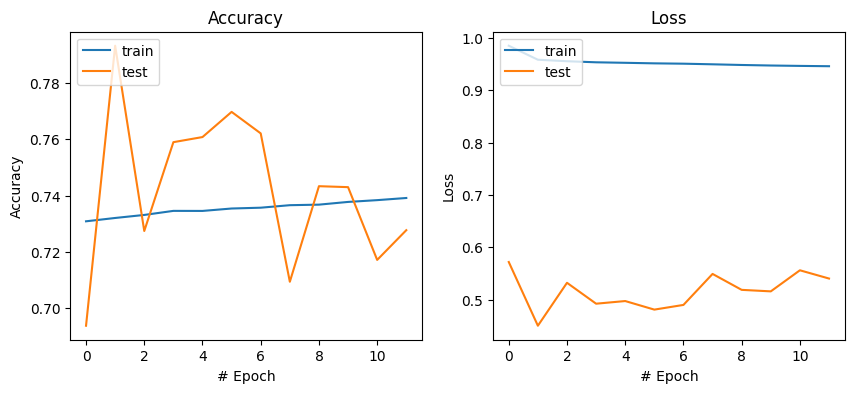

In [210]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

# Accuracy
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('# Epoch')
ax[0].legend(['train', 'test'], loc='upper left')
ax[0].set_title('Accuracy')

# Loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('# Epoch')
ax[1].legend(['train', 'test'], loc='upper left')
ax[1].set_title('Loss')

In [217]:
probabilities = classifier.predict(X_test_sc) #classifier.predict(X_test_sc)

66209/66209 [==============================] - 61s 926us/step


In [218]:
probabilities

array([[0.24813837],
       [0.51940084],
       [0.47500816],
       ...,
       [0.57293785],
       [0.36347476],
       [0.2996681 ]], dtype=float32)

In [219]:
predictions = (probabilities > 0.5).astype('int32')


 Classification report : 
               precision    recall  f1-score   support

         0.0       0.97      0.72      0.83   1911460
         1.0       0.23      0.79      0.36    207206

    accuracy                           0.73   2118666
   macro avg       0.60      0.75      0.59   2118666
weighted avg       0.90      0.73      0.78   2118666

Accuracy   Score :  0.7270905371587594
F1 Score:  0.36019421987832484
Area under curve :  0.8340348112330515 



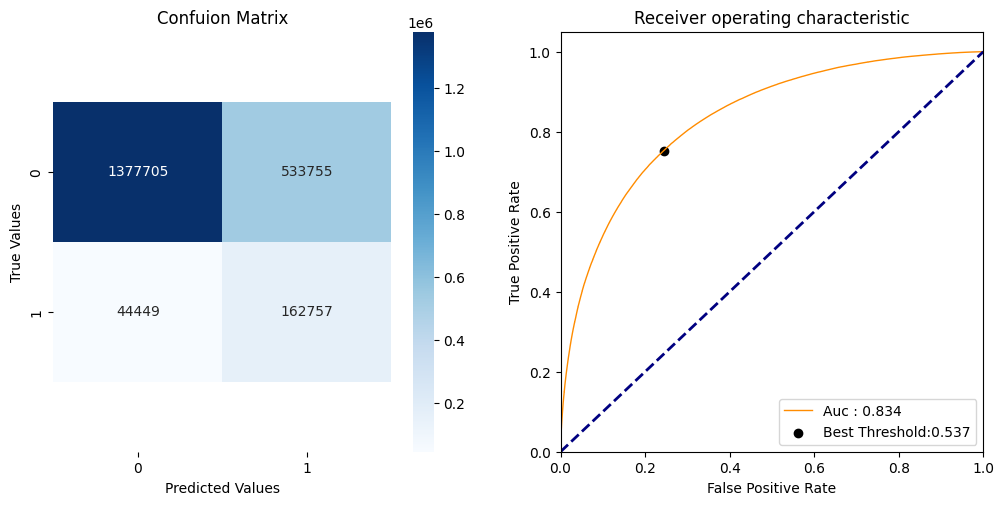

In [220]:
print ("\n Classification report : \n",classification_report(y_test, predictions))
print ("Accuracy   Score : ",accuracy_score(y_test, predictions))

#confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b + 0.5, t - 0.5)
plt.title('Confuion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')

#f1-score
f1 = f1_score(y_test, predictions)
print("F1 Score: ", f1)

#roc_auc_score
model_roc_auc = roc_auc_score(y_test,probabilities) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,probabilities)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
threshold = np.round(thresholds[ix],3)

plt.subplot(222)
plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold:' + str(threshold))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()